SECCION 1
# SCRAPING

## Librerias y módulos

In [ ]:
#Instalamos dependecias
!pip install twint
!pip install nest_asyncio

In [ ]:
#Lineas de código para solucionar algunos problemas de compatibilidad

!pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip uninstall twint && pip3 install twint && pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [ ]:
#Lineas de código para solucionar algunos problemas de compatibilidad

!pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip uninstall twint && pip3 install twint && pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# Intalamos dependencias

!pip install ipywidgets==7.7.1
!pip install wordcloud

❎**DESPUES DE INSTALAR LAS LIBRERIAS ES NECESARIO REINICIAR EL KERNEL**

In [ ]:
#Importamos módulos
import twint
import nest_asyncio
nest_asyncio.apply()
import time
import pandas as pd
import os
import re

## Aplicación de TWINT

Para bajar los TWEET utilizaremos la libreria TWINT que necesita los siguientes parámetros para bajar lo que se está buscando.

In [ ]:
timestr = time.strftime("%Y%m%d")
c = twint.Config()
c.Limit = 10  #dejamos 10 tweets como muestra
#c.Lang = "EN"
c.Store_csv = True
c.Pandas = True
c.Search = "hepatitis"
c.Output = timestr + "hepatitis.csv"
twint.run.Search(c)

1565661746257330177 2022-09-02 11:23:43 +0000 <Hep5G> @ripeacsky @Meat__Hook Mate, yr not getting into thinly-veiled Catholic heaven making memes like that. Hahaha.
1565661015001378816 2022-09-02 11:20:49 +0000 <belhercero> @mmlagoscc Los hepatitis
1565660965148196866 2022-09-02 11:20:37 +0000 <shishitori> Kemarin jenguk kenalan, baru umur 26 udah cuci darah, asam lambung, dan divonis hepatitis juga.
1565660600193191936 2022-09-02 11:19:10 +0000 <neeltjeproeft> Hepatitis A-virus in bosvruchtenmix #Coop #onveiligvoedsel
1565659947307859968 2022-09-02 11:16:34 +0000 <HepCMilitary> Found this in a search engine. "The CPRS Query Tool provides users with the ability to build custom reports and view predefined reports containing clinical information for a select list of patients. This application is an enhancement to the Hepatitis C registry project."
1565659751177920514 2022-09-02 11:15:47 +0000 <SecSaludBAQ> 🏳️‍🌈 La promoción y prevención de la salud sexual, junto a @ENTerritorioCo, llegó 

In [ ]:
# Para vizualizar el dataset obetinido se tiene que usar la linea de comendo que sigue y copiar la rura correspondiente:

df = pd.read_csv("hepatitis.csv", low_memory=False)

df.head()

SECCION 2
# EDA

Generación del primer Data Wrangling y EDA

Se comenzó con un análisis univariado para conocer el dataset. Se detectaron las columnas con abundancia de nulos y los valores significativos en ciertas columnas.

In [ ]:
# importación de las bibliotecas 

from collections import Counter
from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import MinMaxScaler 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import wordcloud as wc
import plotly.express as px

## Primer análisis exploratorio

In [ ]:
# seteo de valores de configuracion
CORTE = 30 # porcentaje maximo de valores nulos permitidos en la columna del dataframe

# acceso a los datos
df_datos = pd.read_csv('20220508_hepatitis.csv', header=0, sep=',', low_memory = False)

In [ ]:
type(df_datos) # Tipos de datos que existen en las columnas del dataframe

pandas.core.frame.DataFrame

In [ ]:
# df.shape() retorna un Tuple asi: (filas, col)
print('Este dataset tiene ' + str(df_datos.shape[0]) + ' filas, y ' + str(df_datos.shape[1]) + ' columnas.')
df_datos.shape

Este dataset tiene 50002 filas, y 36 columnas.


(50002, 36)

In [ ]:
# visualiza los 20 primeros elementos del dataframe
df_datos.head(20)

id      conversation_id               created_at  \
0   1523479063272525824  1523479063272525824  2022-05-08 22:44:48 -03   
1   1523479009694158848  1523418175878037504  2022-05-08 22:44:35 -03   
2   1523478947115139072  1523478947115139072  2022-05-08 22:44:20 -03   
3   1523478841125048320  1523418175878037504  2022-05-08 22:43:55 -03   
4   1523478649827078144  1523425745657245697  2022-05-08 22:43:09 -03   
5   1523478590930944000  1523474108385665026  2022-05-08 22:42:55 -03   
6   1523478301225803776  1522650151793295361  2022-05-08 22:41:46 -03   
7   1523478214881923073  1523423691136110593  2022-05-08 22:41:25 -03   
8   1523478145844015104  1523134991315648513  2022-05-08 22:41:09 -03   
9   1523478059248406528  1523476440884584448  2022-05-08 22:40:48 -03   
10  1523478051585400832  1523478051585400832  2022-05-08 22:40:47 -03   
11  1523477986720161792  1523461446184873984  2022-05-08 22:40:31 -03   
12  1523477982882721793  1523477982882721793  2022-05-08 22:40:30 -03   
13  1523477882764374018  1523477882764374018  2022-05-08 22:40:06 -03   
14  1523477712815329282  1522233907076292611  2022-05-08 22:39:26 -03   
15  1523477690913017857  1523477690913017857  2022-05-08 22:39:21 -03   
16  1523477374217555968  1523477374217555968  2022-05-08 22:38:05 -03   
17  1523477229862531072  1523477229862531072  2022-05-08 22:37:31 -03   
18  1523477195334725632  1523477186786643968  2022-05-08 22:37:22 -03   
19  1523477186786643968  1523477186786643968  2022-05-08 22:37:20 -03   

          date      time  timezone              user_id         username  \
0   2022-05-08  22:44:48      -300             49024508     onionweigher   
1   2022-05-08  22:44:35      -300           2726837169   griffinjones25   
2   2022-05-08  22:44:20      -300  1452730505787551750     ideallyanews   
3   2022-05-08  22:43:55      -300           2726837169   griffinjones25   
4   2022-05-08  22:43:09      -300  1467606239119089676  olganie35346372   
5   2022-05-08  22:42:55      -300  1458394902421663750    yanharyanto11   
6   2022-05-08  22:41:46      -300  1261863577843089408    sofivoltolini   
7   2022-05-08  22:41:25      -300            225047887          mamujam   
8   2022-05-08  22:41:09      -300  1484332345289154560    lximenezsarro   
9   2022-05-08  22:40:48      -300   797482253521747968    hepatitisatoz   
10  2022-05-08  22:40:47      -300  1356999943932706817       candralepi   
11  2022-05-08  22:40:31      -300  1362632064005193728  lindsay91934218   
12  2022-05-08  22:40:30      -300  1356999943932706817       candralepi   
13  2022-05-08  22:40:06      -300            368933390         kakmidah   
14  2022-05-08  22:39:26      -300             50878535   freethesesheep   
15  2022-05-08  22:39:21      -300  1366644453688053762     jabaronline1   
16  2022-05-08  22:38:05      -300             71436318         kompastv   
17  2022-05-08  22:37:31      -300            104446991      detikhealth   
18  2022-05-08  22:37:22      -300           4721766133       pnugroho28   
19  2022-05-08  22:37:20      -300           4721766133       pnugroho28   

                                       name place  ... geo source user_rt_id  \
0                         Onion Weigher 🧅⚖️   NaN  ... NaN    NaN        NaN   
1                                        GJ   NaN  ... NaN    NaN        NaN   
2                              IdeallyaNews   NaN  ... NaN    NaN        NaN   
3                                        GJ   NaN  ... NaN    NaN        NaN   
4                               Dine Nieves   NaN  ... NaN    NaN        NaN   
5                                       Yan   NaN  ... NaN    NaN        NaN   
6                            Sofi Voltolini   NaN  ... NaN    NaN        NaN   
7                          Mariana 🪖 🇺🇦 🤍❤🤍   NaN  ... NaN    NaN        NaN   
8   Laurie Ann Parodia Experta en Hepatitis   NaN  ... NaN    NaN        NaN   
9                             Eric Schmeric   NaN  ... NaN    NaN        NaN   
10        

In [ ]:
# tamaño del dataset
print("el tamaño en bytes del dataset es=",df_datos.size) 

el tamaño en bytes del dataset es= 1800072


In [ ]:
# info (columnas, tipos de datos, filas y nulls)
df_datos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50002 non-null  int64  
 1   conversation_id  50002 non-null  int64  
 2   created_at       50002 non-null  object 
 3   date             50002 non-null  object 
 4   time             50002 non-null  object 
 5   timezone         50002 non-null  int64  
 6   user_id          50002 non-null  int64  
 7   username         50002 non-null  object 
 8   name             50001 non-null  object 
 9   place            34 non-null     object 
 10  tweet            50002 non-null  object 
 11  language         50002 non-null  object 
 12  mentions         50002 non-null  object 
 13  urls             50002 non-null  object 
 14  photos           50002 non-null  object 
 15  replies_count    50002 non-null  int64  
 16  retweets_count   50002 non-null  int64  
 17  likes_count 

Se observó que 10 de las 36 columnas del dataset estaban pobladas  con NaN.

In [ ]:
# datos estadísticos del dataframe
df_datos.describe() 

id  conversation_id  timezone       user_id  replies_count  \
count  5.000200e+04     5.000200e+04   50002.0  5.000200e+04   50002.000000   
mean   1.522054e+18     1.521547e+18    -300.0  5.999266e+17       0.994180   
std    8.034588e+14     1.256703e+16       0.0  6.420997e+17      11.215327   
min    1.520368e+18     2.862209e+17    -300.0  3.832000e+03       0.000000   
25%    1.521440e+18     1.521366e+18    -300.0  2.367702e+08       0.000000   
50%    1.522193e+18     1.522162e+18    -300.0  3.350943e+09       0.000000   
75%    1.522688e+18     1.522656e+18    -300.0  1.290403e+18       1.000000   
max    1.523479e+18     1.523479e+18    -300.0  1.523235e+18    1318.000000   

       retweets_count   likes_count         video  near  geo  source  \
count    50002.000000  50002.000000  50002.000000   0.0  0.0     0.0   
mean         6.148414     19.478361      0.150034   NaN  NaN     NaN   
std        206.534990    599.217138      0.357108   NaN  NaN     NaN   
min          0.000000      0.000000      0.000000   NaN  NaN     NaN   
25%          0.000000      0.000000      0.000000   NaN  NaN     NaN   
50%          0.000000      0.000000      0.000000   NaN  NaN     NaN   
75%          1.000000      2.000000      0.000000   NaN  NaN     NaN   
max      28310.000000  78354.000000      1.000000   NaN  NaN     NaN   

       user_rt_id  user_rt  retweet_id  retweet_date  translate  trans_src  \
count         0.0      0.0         0.0           0.0        0.0        0.0   
mean          NaN      NaN         NaN           NaN        NaN        NaN   
std           NaN      NaN         NaN           NaN        NaN        NaN   
min           NaN      NaN         NaN           NaN        NaN        NaN   
25%           NaN      NaN         NaN           NaN        NaN        NaN   
50%           NaN      NaN         NaN           NaN        NaN        NaN   
75%           NaN      NaN         NaN           NaN        NaN        NaN   
max           NaN      NaN         NaN           NaN        NaN        NaN   

       trans_dest  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

In [ ]:
# Misma informacion transpuesta
df_datos.describe(include=[np.number]).round(2).T 

count          mean           std           min  \
id               50002.0  1.522054e+18  8.034588e+14  1.520368e+18   
conversation_id  50002.0  1.521547e+18  1.256703e+16  2.862209e+17   
timezone         50002.0 -3.000000e+02  0.000000e+00 -3.000000e+02   
user_id          50002.0  5.999266e+17  6.420997e+17  3.832000e+03   
replies_count    50002.0  9.900000e-01  1.122000e+01  0.000000e+00   
retweets_count   50002.0  6.150000e+00  2.065300e+02  0.000000e+00   
likes_count      50002.0  1.948000e+01  5.992200e+02  0.000000e+00   
video            50002.0  1.500000e-01  3.600000e-01  0.000000e+00   
near                 0.0           NaN           NaN           NaN   
geo                  0.0           NaN           NaN           NaN   
source               0.0           NaN           NaN           NaN   
user_rt_id           0.0           NaN           NaN           NaN   
user_rt              0.0           NaN           NaN           NaN   
retweet_id           0.0           NaN           NaN           NaN   
retweet_date         0.0           NaN           NaN           NaN   
translate            0.0           NaN           NaN           NaN   
trans_src            0.0           NaN           NaN           NaN   
trans_dest           0.0           NaN           NaN           NaN   

                          25%           50%           75%           max  
id               1.521440e+18  1.522193e+18  1.522688e+18  1.523479e+18  
conversation_id  1.521366e+18  1.522162e+18  1.522656e+18  1.523479e+18  
timezone        -3.000000e+02 -3.000000e+02 -3.000000e+02 -3.000000e+02  
user_id          2.367702e+08  3.350943e+09  1.290403e+18  1.523235e+18  
replies_count    0.000000e+00  0.000000e+00  1.000000e+00  1.318000e+03  
retweets_count   0.000000e+00  0.000000e+00  1.000000e+00  2.831000e+04  
likes_count      0.000000e+00  0.000000e+00  2.000000e+00  7.835400e+04  
video            0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
near                      NaN           NaN           NaN           NaN  
geo                       NaN           NaN           NaN           NaN  
source                    NaN           NaN           NaN           NaN  
user_rt_id                NaN           NaN           NaN           NaN  
user_rt                   NaN           NaN           NaN           NaN  
retweet_id                NaN           NaN           NaN           NaN  
retweet_date              NaN           NaN           NaN           NaN  
translate                 NaN           NaN           NaN           NaN  
trans_src                 NaN           NaN           NaN           NaN  
trans_dest                NaN           NaN           NaN           NaN

In [ ]:
#Info categórica
df_datos.describe(include=[object, pd.Categorical]).T

count unique                                                top  \
created_at  50002  46903                            2022-05-07 09:54:04 -03   
date        50002      9                                         2022-05-06   
time        50002  36304                                           08:15:00   
username    50002  28092                                          kompascom   
name        50001  27385                                         Kompas.com   
place          34     12  {'type': 'Point', 'coordinates': [-26.82681702...   
tweet       50002  49530                                         #Hepatitis   
language    50002     43                                                 en   
mentions    50002   2218                                                 []   
urls        50002  17832                                                 []   
photos      50002   6818                                                 []   
hashtags    50002   4470                                                 []   
cashtags    50002     17                                                 []   
link        50002  50002  https://twitter.com/KatePri14608408/status/152...   
quote_url    3615   2352  https://twitter.com/farid__jalali/status/15202...   
thumbnail    7502   7415  https://pbs.twimg.com/amplify_video_thumb/1522...   
reply_to    50002   8929                                                 []   

             freq  
created_at     14  
date         9287  
time           34  
username      132  
name          132  
place          10  
tweet          19  
language    19199  
mentions    45513  
urls        25421  
photos      43124  
hashtags    41312  
cashtags    49970  
link            1  
quote_url     103  
thumbnail       8  
reply_to    36847

Utilizaremos pandasprofiling para analizar cada una de las variables

In [ ]:
perfil = pp.ProfileReport(df_datos, minimal = True)
perfil

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Limpieza

Despues del análisis cada una de las variables procedemos a la limpieza de valores nulos

In [ ]:
# calculo los porcentajes de valores nulos y elimino las que superen el corte

columnas_eliminadas = []
for i in df_datos.columns:
    cant_reg = df_datos.shape[0]
    cant = df_datos[i].isna().sum()
    porc = cant/cant_reg*100
    print ("Columna: ",i,"\t valores nulos: ",cant,"\t porcentaje: ", porc)
    if porc > CORTE :
        print ("Eliminando columna ...")
        df_datos.drop([i], axis = 1, inplace = True)
        columnas_eliminadas.append(i)
    
print (columnas_eliminadas) 

Columna:  id 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  conversation_id 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  created_at 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  date 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  time 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  timezone 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  user_id 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  username 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  name 	 valores nulos:  1 	 porcentaje:  0.001999920003199872
Columna:  place 	 valores nulos:  49968 	 porcentaje:  99.9320027198912
Eliminando columna ...
Columna:  tweet 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  language 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  mentions 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  urls 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  photos 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  replies_count 	 valores nulos:  0 	 porcentaje:  0.0
Columna:  retweets_count 	 valor

In [ ]:
#Repetimos análisis después de la primera limpieza

perfil = pp.ProfileReport(df_datos, minimal = True)
perfil

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Con el proceso de data wrangling univariado se eliminaron las columnas NaN

In [ ]:
# estos datos los comparo con los que obtenemos al agrupar los tweets por dia, para validar el proceso.
for i in 'replies_count','retweets_count', 'likes_count': 
  print (df_datos[i].sum())

49711
307433
973957


## Analisis de hashtag y gráficos univariados

EDA: armado de listas de hashtags

In [ ]:
# nuevo dataframe agrupando por fecha
df_datos2 = df_datos.groupby('date').sum() 

In [ ]:
# armado lista de todos los hashtags 

lista = []
for i in df_datos2.index:
    lista.append([])
df_datos2['hashtags'] = lista

for i in df_datos.index:
    dia=df_datos.loc[i]['date']
    ht =df_datos.loc[i]['hashtags']
    for j in eval(ht):
        df_datos2.loc[dia]['hashtags'].append(j)
        
df_datos2 = df_datos2.copy()

# ordeno alfabeticamente los hashtags de cada dia
        
listadehashtags = []
lista = []

for i in df_datos2.index:
        lista = df_datos2.loc[i]['hashtags']
        conjunto = set(lista)
        lista = list(conjunto)
        lista.sort()
        listadehashtags.append(lista)
        
                      
df_datos2['hashtags'] = listadehashtags
df_datos2

id  conversation_id   timezone       user_id  \
date                                                                 
2022-04-30  4.217785e+21     4.216275e+21  -832200.0  1.730035e+21   
2022-05-01  4.606429e+21     4.603777e+21  -908700.0  2.020783e+21   
2022-05-02  7.199773e+21     7.196482e+21 -1419900.0  2.905719e+21   
2022-05-03  1.015143e+22     1.014799e+22 -2001600.0  4.063694e+21   
2022-05-04  8.062851e+21     8.060258e+21 -1589400.0  3.175444e+21   
2022-05-05  1.216881e+22     1.216573e+22 -2398200.0  4.087531e+21   
2022-05-06  1.414047e+22     1.413734e+22 -2786100.0  5.215287e+21   
2022-05-07  9.886981e+21     9.883331e+21 -1947600.0  4.248217e+21   
2022-05-08  5.671238e+21     5.669191e+21 -1116900.0  2.550818e+21   

            replies_count  retweets_count  likes_count  retweet   video  \
date                                                                      
2022-04-30         3898.0         13649.0      56836.0        0   351.0   
2022-05-01         3216.0         19018.0      79020.0        0   299.0   
2022-05-02         6705.0        106816.0     318645.0        0   665.0   
2022-05-03         5709.0         34940.0     107777.0        0   946.0   
2022-05-04         3441.0         17342.0      45285.0        0   829.0   
2022-05-05         8343.0         46525.0     135584.0        0  1561.0   
2022-05-06         8760.0         38087.0     111262.0        0  1545.0   
2022-05-07         6845.0         23476.0      92449.0        0   851.0   
2022-05-08         2794.0          7580.0      27099.0        0   455.0   

                                                     hashtags  
date                                                           
2022-04-30  [30abr, 5abr, acayucan, adadikompas, adenovire...  
2022-05-01  [1demayo, 1el, 1may, 1mayo, 24hour, 24hourindo...  
2022-05-02  ay, 247health, 2may, 2mayo, 30daysofgiving,...  
2022-05-03  ay, 10am, 123info, 24hour, 24hourindonesia...  
2022-05-04  , 04may, 1020am, 10am, 13añoscanaimaeducat...  
2022-05-05  ay, 05mayo, 1069fm, 1r4p, 24horascentral, ...  
2022-05-06  [1000am, 1069fm, 109cases, 123info, 18casos, 2...  
2022-05-07  [07demayo, 07may, 109cases, 123info, 18casos, ...  
2022-05-08  ay, 8may, 8mayo, aai2022, aberschweden, act...

In [ ]:
# Visualizamos los datos por fecha

df_datos2['hashtags']

date
2022-04-30    [30abr, 5abr, acayucan, adadikompas, adenovire...
2022-05-01    [1demayo, 1el, 1may, 1mayo, 24hour, 24hourindo...
2022-05-02    ay, 247health, 2may, 2mayo, 30daysofgiving,...
2022-05-03    ay, 10am, 123info, 24hour, 24hourindonesia...
2022-05-04    , 04may, 1020am, 10am, 13añoscanaimaeducat...
2022-05-05    ay, 05mayo, 1069fm, 1r4p, 24horascentral, ...
2022-05-06    [1000am, 1069fm, 109cases, 123info, 18casos, 2...
2022-05-07    [07demayo, 07may, 109cases, 123info, 18casos, ...
2022-05-08    ay, 8may, 8mayo, aai2022, aberschweden, act...
Name: hashtags, dtype: object

In [ ]:
# Visualizamos los datos en una fecha concreta

df_datos2.loc['2022-05-08']['hashtags']

['7may',
 '8may',
 '8mayo',
 'aai2022',
 'aberschweden',
 'actualidad',
 'ade',
 'adenovirus',
 'agenciamxnoticias',
 'ahora',
 'ahoraenrivadavia',
 'aids',
 'akut',
 'aldíaconvigía',
 'alinfinitoymasalla',
 'alinfinitoymásallá',
 'ambassador',
 'america',
 'anak',
 'antisipasi',
 'argentina',
 'argentinaenvivofinde',
 'asiseinforma',
 'australia',
 'autism',
 'autoimmune',
 'autoimmunerkrankungen',
 'autoimmunity',
 'ba5',
 'bajolalupaec',
 'bajwakashukria',
 'bazofiaponzoñosaexperimental',
 'bbcnews',
 'bbm',
 'bekum',
 'beningjugawarna',
 'beritajogja',
 'beritasonora',
 'beritaterbaru',
 'beritaterkini',
 'beritaterpopuler',
 'beritaunpad',
 'bersamamelayanirakyat',
 'biayarumahsakit',
 'bibleprophecy',
 'bidan',
 'bigpharma',
 'billgates',
 'biologyweapons',
 'biopower',
 'birthdose',
 'blood',
 'bloodclot',
 'blutwerte',
 'bocah',
 'bolloxtics',
 'borneobulletin',
 'boxing',
 'bpjskesehatan',
 'braindamage',
 'breaking',
 'breakingnews',
 'brevesactualidadnacional',
 'brimun',
 '

Nube de palabras - hashtags del dia 2022-05-02

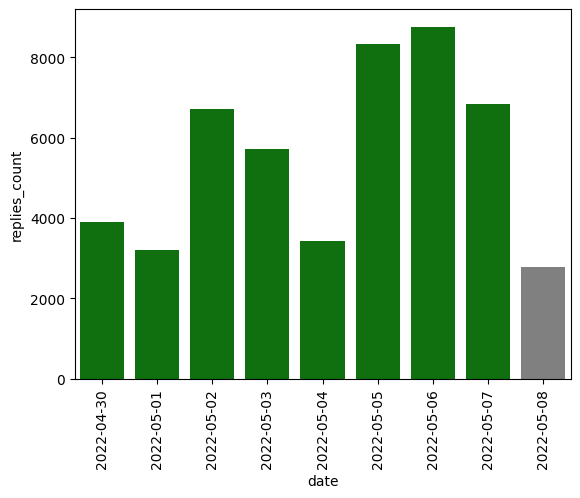

In [ ]:
clrs = ['grey' if (x < max(df_datos2['replies_count'])) else 'green' for x in df_datos2['retweets_count'] ]
sns.barplot(x=df_datos2.index,y=df_datos2['replies_count'], color='gray', palette=clrs)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = str(df_datos2.loc['2022-05-02']['hashtags'])
stopwords = set(STOPWORDS) 

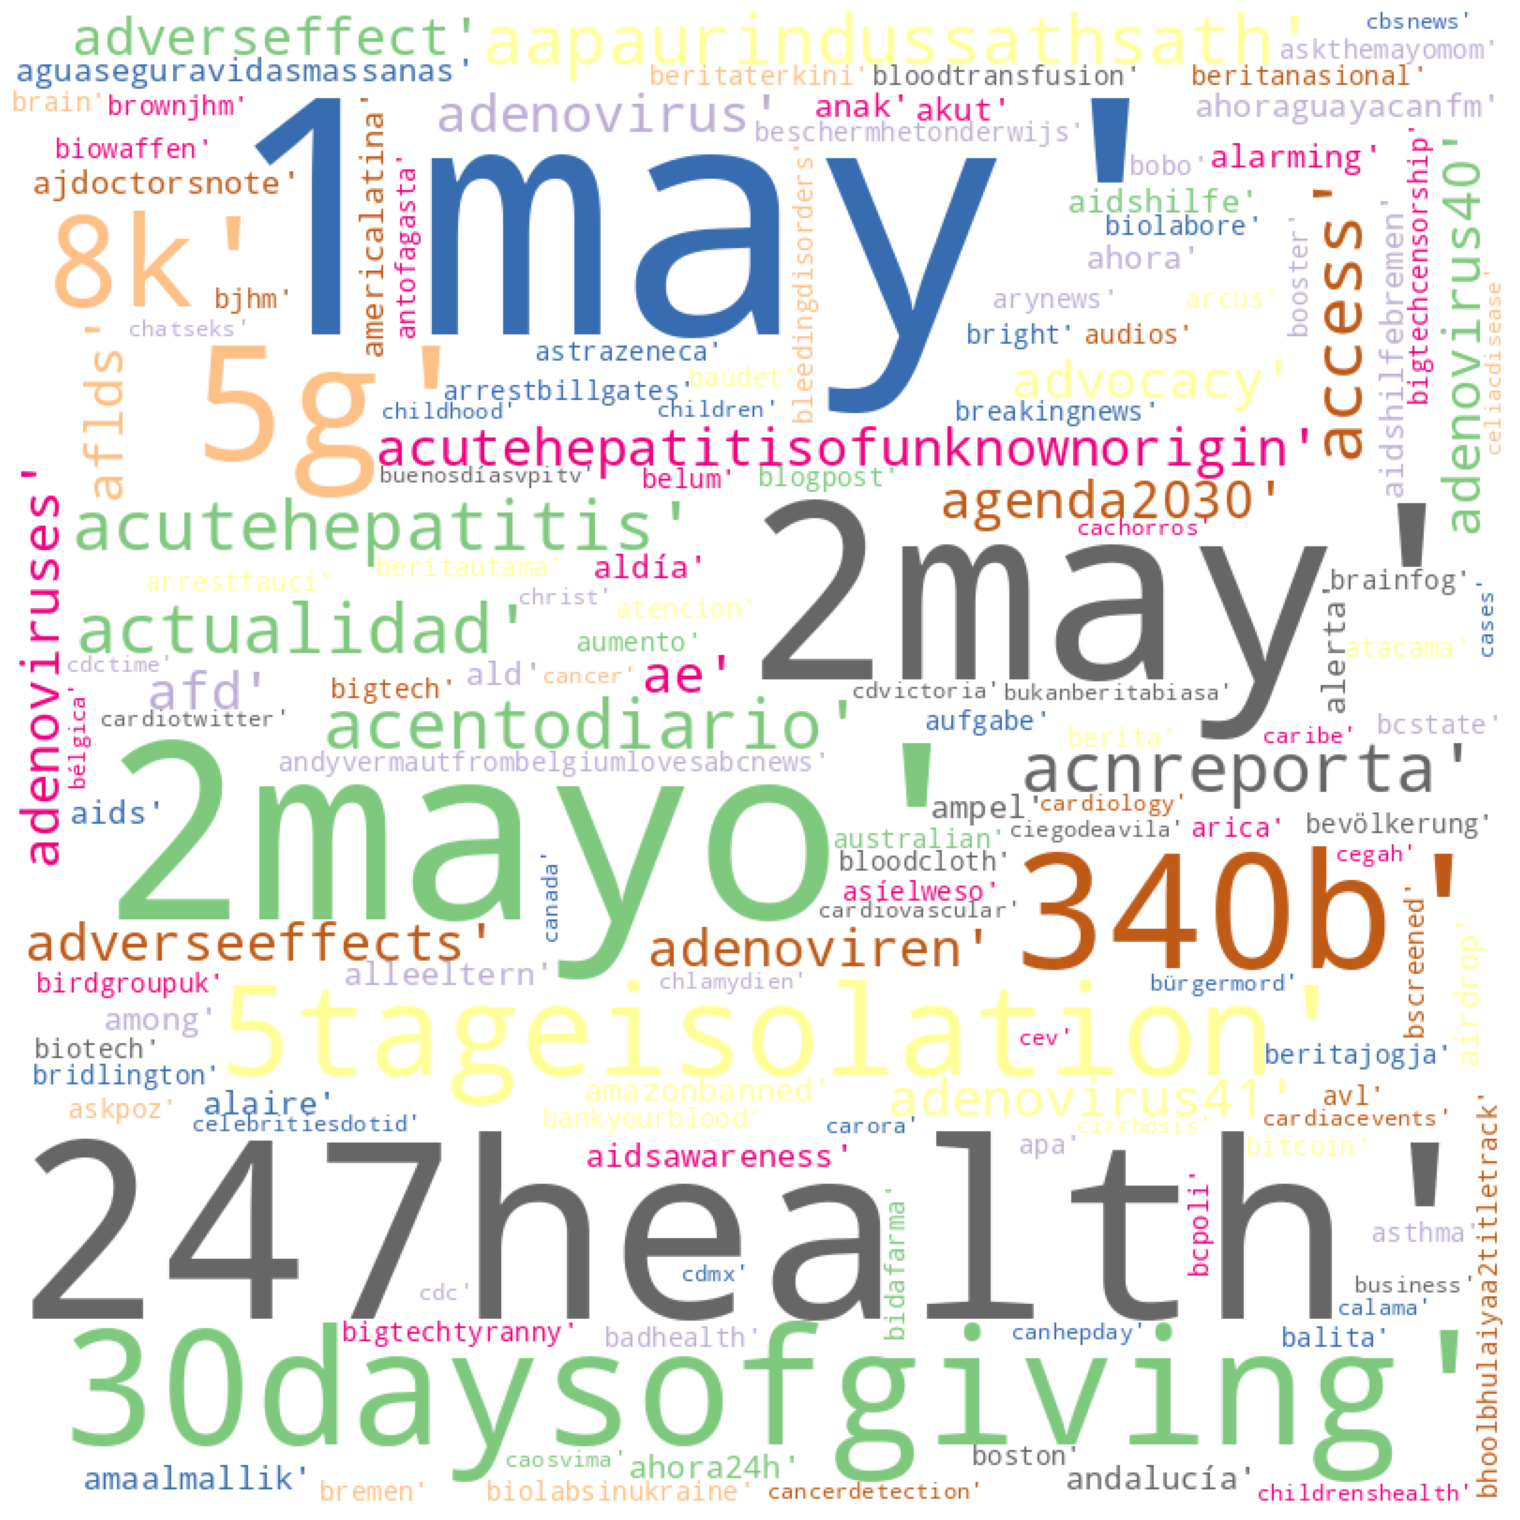

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, colormap='Accent',
                min_font_size = 10).generate(comment_words) 
  
plt.figure(figsize = (20, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Obtención de # por idioma:

In [ ]:
df_datoslang = df_datos.groupby('language').count()
df_datoslang.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'tweet', 'mentions', 'urls', 'photos',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'video', 'reply_to'],
      dtype='object')

Lista de # por idioma:

In [ ]:
## arma lista 

## inicializo columna hashtags con listas en blanco

lista = []
for i in df_datoslang.index:
    lista.append([])
df_datoslang['hashtags'] = lista

## cargo los hashtags por idioma

for i in df_datos.index:
    idioma = df_datos.loc[i]['language']
    ht = df_datos.loc[i]['hashtags']
    for j in eval(ht):
        df_datoslang.loc[idioma]['hashtags'].append(j)
        
df_datoslang = df_datoslang.copy()

# ordeno alfabeticamente los hashtags de cada dia
                
listadehashtags = []
lista = []

for i in df_datoslang.index:
        lista = df_datoslang.loc[i]['hashtags']
        conjunto = set(lista)
        lista = list(conjunto)
        lista.sort()
        listadehashtags.append(lista)
        
                      
df_datoslang['hashtags'] = listadehashtags
df_datoslang

id  conversation_id  created_at   date   time  timezone  user_id  \
language                                                                        
ar           51               51          51     51     51        51       51   
ca          154              154         154    154    154       154      154   
cs            2                2           2      2      2         2        2   
cy            1                1           1      1      1         1        1   
da           62               62          62     62     62        62       62   
de         1060             1060        1060   1060   1060      1060     1060   
el            3                3           3      3      3         3        3   
en        19199            19199       19199  19199  19199     19199    19199   
es        16274            16274       16274  16274  16274     16274    16274   
et           46               46          46     46     46        46       46   
eu            4                4           4      4      4         4        4   
fa            2                2           2      2      2         2        2   
fi            4                4           4      4      4         4        4   
fr           70               70          70     70     70        70       70   
gu            3                3           3      3      3         3        3   
hi           15               15          15     15     15        15       15   
ht          233              233         233    233    233       233      233   
hu            4                4           4      4      4         4        4   
in        11560            11560       11560  11560  11560     11560    11560   
is            1                1           1      1      1         1        1   
it           23               23          23     23     23        23       23   
iw            1                1           1      1      1         1        1   
ja           77               77          77     77     77        77       77   
ko            3                3           3      3      3         3        3   
lt           42               42          42     42     42        42       42   
lv            3                3           3      3      3         3        3   
ml            1                1           1      1      1         1        1   
mr            2                2           2      2      2         2        2   
nl          423              423         423    423    423       423      423   
no            2                2           2      2      2         2        2   
pl            4                4           4      4      4         4        4   
pt           18               18          18     18     18        18       18   
ro           18               18          18     18     18        18       18   
ru            1                1           1      1      1         1        1   
sl            8                8           8      8      8         8        8   
sv            1                1           1      1      1         1        1   
te            1                1           1      1      1         1        1   
th            5                5           5      5      5         5        5   
tl           42               42          42     42     42        42       42   
tr           20               20          20     20     20        20       20   
und         541              541         541    541    541       541      541   
ur            3                3           3      3      3         3        3   
zh           15               15          15     15     15        15       15   

          username   name  tweet  ...  photos  replies_count  retweets_count  \
language                          ...                                          
ar              51     51     51  ...      51             51              51   
ca             154    154    154  ...     154            154             154   
cs               2      2      2  ...       2  

In [ ]:
df_lang = df_datoslang['id'].sort_values(ascending = False)[:6]
df_lang

language
en     19199
es     16274
in     11560
de      1060
und      541
nl       423
Name: id, dtype: int64

In [ ]:
df_datoslang['hashtags']

language
ar     [causes, hepatitis, kids, paracetamol, update,...
ca     [alamerda, aneualamerda, aydios, debatscaixare...
cs                                                    []
cy                                                    []
da     [8k, corona, covid19, covidisntover, dkmedier,...
de     [1r4p, 5tageisolation, aberschweden, accountab...
el     [covid, crimesagainstchildren, hepatitis, pfizer]
en     [109cases, 123info, 1el, 2002bhps, 2022outbrea...
es     ay, 04m, 04may, 05may, 05mayo, 07demayo, 0...
et     [aids, aidsawareness, alex, alex_saab, anthrax...
eu                                           [hepatitis]
fa         [ariananews, children, health, hepatitis, us]
fi                                    [covid, hepatitis]
fr     [chelsea, childabuse, china, conférence, covid...
gu     [cdc, centersfordiseasecontrol, fever, healthw...
hi     [acutehepatitis, childrenhealth, choithramhosp...
ht     [bjhm, blogpost, breakout, brownjhm, cdc, chil...
hu                 [adenov

In [ ]:
df_datoslang.loc['es']['hashtags']

['03may',
 '04m',
 '04may',
 '05may',
 '05mayo',
 '07demayo',
 '07may',
 '1000am',
 '1020am',
 '1069fm',
 '10am',
 '123info',
 '13añoscanaimaeducativo',
 '18casos',
 '1demayo',
 '1may',
 '1mayo',
 '1noticias',
 '2030agenda',
 '24am',
 '24horas',
 '24horascentral',
 '24horassnt',
 '2may',
 '2mayo',
 '30abr',
 '30añoscontigo',
 '3dehoy',
 '3may',
 '3mayo',
 '3mayo120',
 '4alhilo',
 '4may',
 '4may2022',
 '4mayo',
 '5abr',
 '5g',
 '5may',
 '5mayo',
 '650am',
 '680am',
 '6may',
 '6mayo',
 '730am',
 '780am',
 '7may',
 '7mayo',
 '8may',
 '8mayo',
 '920am',
 '970am',
 '9may',
 'abcciencia',
 'abcnoticiascentral',
 'abctvpy',
 'abrelosojos',
 'abriendolaconversación',
 'acapulco',
 'acarigua',
 'acayucan',
 'acceso',
 'acentodiario',
 'aclara',
 'acnreporta',
 'actividadparlamentaria',
 'actualidad',
 'actualidaddl',
 'actualidadencp',
 'acustiknoticias',
 'adenovirus',
 'adenovirus40',
 'adenovirus41',
 'adenovirus41f',
 'adenovirusf41',
 'adnhoy',
 'adolescentes',
 'afectados',
 'afp',
 'afue

Armado de gráfico múltiple

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)

plt.figure.figsize=(20,15)

wordcloud = WordCloud(width=1024, height=1024, background_color ='white', 
                colormap='Blues',stopwords = stopwords, min_font_size = 10)

graf=1

for i in df_lang.index[:6]:
    
    palabras = str(df_datoslang.loc[i]['hashtags'])
    stopwords = set(STOPWORDS) 
    wordcloud.generate(palabras) 
   
    plt.subplot(2,3,graf)
    plt.imshow(wordcloud,interpolation="bilinear") 
    plt.axis("off") 
    plt.title('Idioma: ' + i)
    graf +=1


plt.show() 

Top 20 usuarios por cantidad de tw

In [ ]:
df_datos3a = df_datos.groupby('username').count()['id'].sort_values(ascending=False).iloc[:20]
df_datos3a

username
kompascom          132
lximenezsarro      125
_vagabnd           106
topinfo_id         102
hep5g              101
jawapos             98
salsabeef           97
detikhealth         93
detikcom            89
tamerlane9470       86
noticierovv         86
pikiran_rakyat      78
jpnncom             75
beritagemparcom     70
alnaviocom          60
tempodotco          59
albertsolo2         58
sherlocksspring     57
mohamed04680219     57
masanpra            57
Name: id, dtype: int64

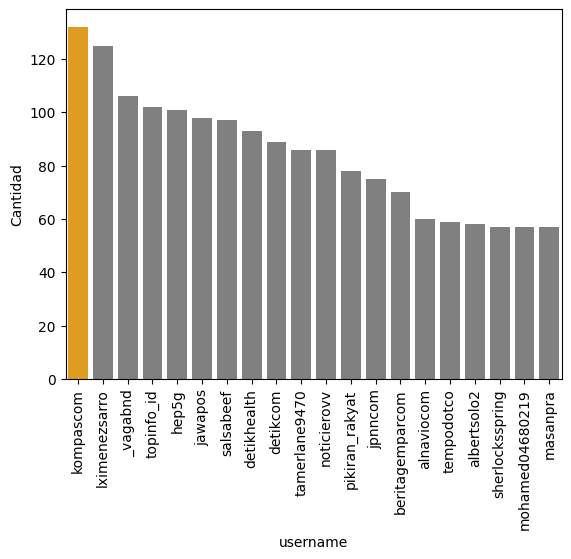

In [ ]:
clrs = ['grey' if (x < max(df_datos3a)) else 'orange' for x in df_datos3a ]

sns.barplot(x=df_datos3a.index,y=df_datos3a, palette=clrs)
plt.ylabel('Cantidad')


plt.xticks(rotation=90)
plt.show()

Conclusiones del análisis univariado

Diez de las 36 columnas estaban completamente pobladas de Nan, y otras tres tenían más de un 30%(CORTE) de valores NaN.   Se observó que la nube de hashtags no muestra "hepatitis" como # más repetido. La mención en los tw recolectados es a través de la inclusión del vocablo "hepatitis " en el cuerpo de los tw. Si se aprecia el # "adenovirus" como presuntamente causante de la enfermedad en niños.

## Analisis multivariado

In [ ]:
#Importamos los paquetes (empieza MULTIVARIADO)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler 
import numpy as np 

In [ ]:
# Se carga nuevamente el csv en un nuevo dataframe

df=df_datos = pd.read_csv('20220508_hepatitis.csv',header=0, sep=',', low_memory = False)

In [ ]:
#Visualizamos dataset

df.head()

id      conversation_id               created_at  \
0  1523479063272525824  1523479063272525824  2022-05-08 22:44:48 -03   
1  1523479009694158848  1523418175878037504  2022-05-08 22:44:35 -03   
2  1523478947115139072  1523478947115139072  2022-05-08 22:44:20 -03   
3  1523478841125048320  1523418175878037504  2022-05-08 22:43:55 -03   
4  1523478649827078144  1523425745657245697  2022-05-08 22:43:09 -03   

         date      time  timezone              user_id         username  \
0  2022-05-08  22:44:48      -300             49024508     onionweigher   
1  2022-05-08  22:44:35      -300           2726837169   griffinjones25   
2  2022-05-08  22:44:20      -300  1452730505787551750     ideallyanews   
3  2022-05-08  22:43:55      -300           2726837169   griffinjones25   
4  2022-05-08  22:43:09      -300  1467606239119089676  olganie35346372   

                name place  ... geo source user_rt_id user_rt retweet_id  \
0  Onion Weigher 🧅⚖️   NaN  ... NaN    NaN        NaN     NaN        NaN   
1                 GJ   NaN  ... NaN    NaN        NaN     NaN        NaN   
2       IdeallyaNews   NaN  ... NaN    NaN        NaN     NaN        NaN   
3                 GJ   NaN  ... NaN    NaN        NaN     NaN        NaN   
4        Dine Nieves   NaN  ... NaN    NaN        NaN     NaN        NaN   

                                            reply_to  retweet_date  translate  \
0                                                 []           NaN        NaN   
1  [{'screen_name': 'stargazeruk7', 'name': 'Nata...           NaN        NaN   
2                                                 []           NaN        NaN   
3  [{'screen_name': 'stargazeruk7', 'name': 'Nata...           NaN        NaN   
4  [{'screen_name': 'GovPierluisi', 'name': 'Gobe...           NaN        NaN   

  trans_src trans_dest  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  

[5 rows x 36 columns]

In [ ]:
# Limpiamos los nulos,
# en este caso se hace el ensayo de una limpieza más agresiva, donde se elimina todas las columnas con datos nulos.

df.dropna(axis = 1, inplace=True)

In [ ]:
# Chequeamos la limpieza

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               50002 non-null  int64 
 1   conversation_id  50002 non-null  int64 
 2   created_at       50002 non-null  object
 3   date             50002 non-null  object
 4   time             50002 non-null  object
 5   timezone         50002 non-null  int64 
 6   user_id          50002 non-null  int64 
 7   username         50002 non-null  object
 8   tweet            50002 non-null  object
 9   language         50002 non-null  object
 10  mentions         50002 non-null  object
 11  urls             50002 non-null  object
 12  photos           50002 non-null  object
 13  replies_count    50002 non-null  int64 
 14  retweets_count   50002 non-null  int64 
 15  likes_count      50002 non-null  int64 
 16  hashtags         50002 non-null  object
 17  cashtags         50002 non-null

In [ ]:
# Tranformares los Id a variables categóricas para mejorar el uso de datos

df[['id', 'conversation_id', 'user_id']] = df[['id', 'conversation_id', 'user_id']].astype(str)

In [ ]:
df.head()

id      conversation_id               created_at  \
0  1523479063272525824  1523479063272525824  2022-05-08 22:44:48 -03   
1  1523479009694158848  1523418175878037504  2022-05-08 22:44:35 -03   
2  1523478947115139072  1523478947115139072  2022-05-08 22:44:20 -03   
3  1523478841125048320  1523418175878037504  2022-05-08 22:43:55 -03   
4  1523478649827078144  1523425745657245697  2022-05-08 22:43:09 -03   

         date      time  timezone              user_id         username  \
0  2022-05-08  22:44:48      -300             49024508     onionweigher   
1  2022-05-08  22:44:35      -300           2726837169   griffinjones25   
2  2022-05-08  22:44:20      -300  1452730505787551750     ideallyanews   
3  2022-05-08  22:43:55      -300           2726837169   griffinjones25   
4  2022-05-08  22:43:09      -300  1467606239119089676  olganie35346372   

                                               tweet language  ... photos  \
0  Tried to take my children to Chi-Chi's but it ...       en  ...     []   
1  @stargazeruk7 Hep A like you mention is an ent...       en  ...     []   
2  UK Health Safety Authority: No evidence linkin...       en  ...     []   
3  @stargazeruk7 Autoimmune hepatitis cannot spre...       en  ...     []   
4  @GovPierluisi La fé??? Usted sabe lo que es es...       es  ...     []   

  replies_count retweets_count  likes_count  \
0             0              0            0   
1             0              0            0   
2             0              0            0   
3             0              0            0   
4             0              0            0   

                                  hashtags  cashtags  \
0                                       []        []   
1                                       []        []   
2  ['childhood', 'health', 'safety', 'uk']        []   
3                                       []        []   
4                                       []        []   

                                                link retweet video  \
0  https://twitter.com/onionweigher/status/152347...   False     0   
1  https://twitter.com/griffinjones25/status/1523...   False     0   
2  https://twitter.com/IdeallyaNews/status/152347...   False     0   
3  https://twitter.com/griffinjones25/status/1523...   False     0   
4  https://twitter.com/OlgaNie35346372/status/152...   False     0   

                                            reply_to  
0                                                 []  
1  [{'screen_name': 'stargazeruk7', 'name': 'Nata...  
2                                                 []  
3  [{'screen_name': 'stargazeruk7', 'name': 'Nata...  
4  [{'screen_name': 'GovPierluisi', 'name': 'Gobe...  

[5 rows x 22 columns]

ANALISIS

0    28099
1     7734
2     3407
3     1808
4     8954
Name: likes_count, dtype: int64


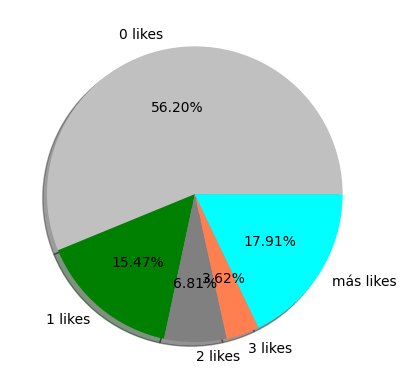

In [ ]:
# Grafico de tortas de likes modificado para que muestre los 4 mas importantes y al resto ...

likes_por2 = df['likes_count'].value_counts().sort_values(ascending=False)[:4]
likes_por2[4] = df['likes_count'].value_counts().sort_values(ascending=False)[4:].sum()
print (likes_por2)
colores = ['silver','green', 'grey','coral','cyan']
labels = ['0 likes','1 likes','2 likes', '3 likes','más likes']
plt.pie(x=likes_por2, colors = colores, autopct='%1.2f%%', shadow=True, labels=labels)

plt.show()

Como se ve, más de la mitad de los tweets no tienen likes, o tienen muy pocos. Entre 0,1 y 2 likes ocupan más de tres cuartos de la torta, de lo que se sigue que gran parte de los publicado no tiene tiene importancia para los otros usuarios.

0    37197
1     5250
2     2019
3     1234
4     4302
Name: retweets_count, dtype: int64


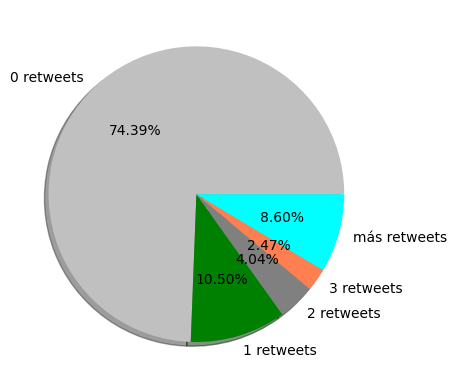

In [ ]:
# Grafico de tortas de retweets modificado para que muestre los 4 mas importantes y al resto ...

retweet_por2 = df['retweets_count'].value_counts().sort_values(ascending=False)[:4]
retweet_por2[4] = df['retweets_count'].value_counts().sort_values(ascending=False)[4:].sum()
print (retweet_por2)
colores = ['silver','green', 'grey','coral','cyan']
labels = ['0 retweets','1 retweets','2 retweets', '3 retweets','más retweets']
plt.pie(x=retweet_por2, colors = colores, autopct='%1.2f%%', shadow=True, labels=labels)

plt.show()

Con los retweets se agudiza la tendencia marcada anteriormente, 3/4 de la torta no tiene retweet. En la lógica funcional de Twitter, implica que casi el 75% de los tw carecen de interés para los usuarios que no son el emisor del tw.

0    36363
1     8963
2     2094
3      841
4     1741
Name: replies_count, dtype: int64


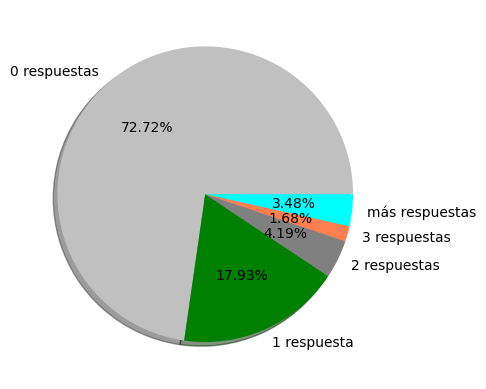

In [ ]:
# Grafico de tortas de respuestas modificado para que muestre los 4 mas importantes y al resto ...

replies_por2 = df['replies_count'].value_counts().sort_values(ascending=False)[:4]
replies_por2[4] = df['replies_count'].value_counts().sort_values(ascending=False)[4:].sum()
print (replies_por2)
colores = ['silver','green', 'grey','coral','cyan']
labels = ['0 respuestas','1 respuesta','2 respuestas', '3 respuestas','más respuestas']
plt.pie(x=replies_por2, colors = colores, autopct='%1.2f%%', shadow=True, labels=labels)

plt.show()

Mismo panorama que venimos describiendo anteriormente: el 72% de los tweets no tienen respuesta, solo el 17 tiene una respuesta.

Data wrangling del análsis multivariado

**Para el análisis multivariado nos centraremos en los "hilos" con más intervenciones en el dataset**

In [ ]:
conv_id = df['conversation_id'].value_counts().sort_values(ascending=False)[:10]

In [ ]:
conv_id

1521106997395206144    232
1520979918452305920    158
1523050102298152960     95
1522190680826986496     83
1521185561658236930     77
1520283624225996801     71
1521077967178317825     66
1521514123967619073     65
1522635878056796162     60
1521440159426039808     57
Name: conversation_id, dtype: int64

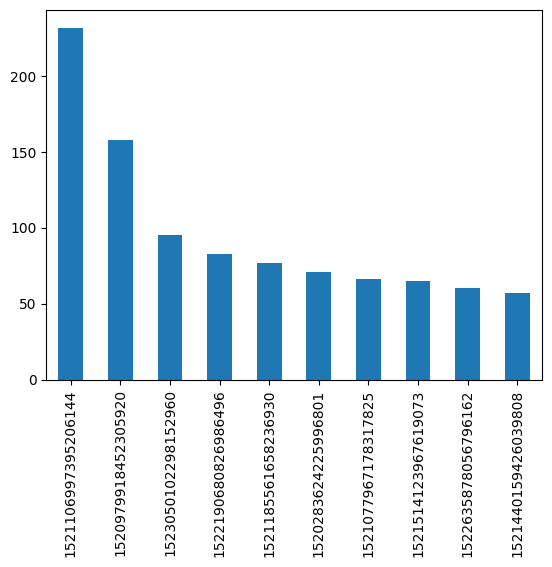

In [ ]:
# Graficamos las 10 conversaciones más importantes por likes

ax = conv_id.plot.bar(y='Likes', x='conversation id', rot=90)

**Se realizaron algunos cortes en los datos para constatar lo anteriormente expuesto:**

In [ ]:
# Corte a los 39000 tw, llegan hasta 2 likes

conv_id2 = df['conversation_id'].value_counts().sort_values(ascending=True)[:39000]
conv_id2

1522421870191988737    1
1522201784348991493    1
1522956201687928832    1
1520958621273968641    1
1522254282820620288    1
                      ..
1522150056547155968    2
1522634490673254402    2
1523108692928786433    2
1522381554969985028    2
1521519781958012928    2
Name: conversation_id, Length: 39000, dtype: int64

In [ ]:
# Corte entre 39k y 40k, pasan de 2 a 232 likes.

conv_id3 = df['conversation_id'].value_counts().sort_values(ascending=True)[39000:49000]
conv_id3

1523032313491345408      2
1521301933897756677      2
1521905465894084610      2
1520663078370635776      2
1523310473881407489      2
                      ... 
1521185561658236930     77
1522190680826986496     83
1523050102298152960     95
1520979918452305920    158
1521106997395206144    232
Name: conversation_id, Length: 2025, dtype: int64

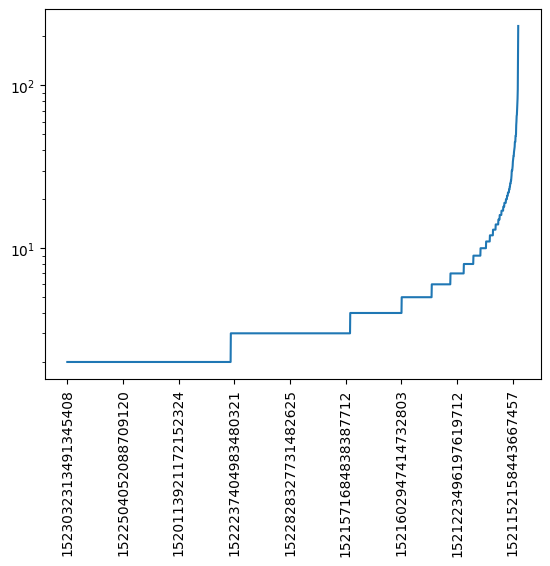

In [ ]:
# Grafico logaritmico del último corte para visualizar mejor el aumento exponencial de likes :

ax2 = conv_id3.plot.line(y='Likes', x='conversation id', rot=90, logy=True)

In [ ]:
# Filtramos el dataset para trabajar con las 10 conversaciones más importantes

conv = df[df.conversation_id.isin(['1523050102298152960', '1522635878056796162','1522735443636363264', '1522960077023457280','1522986274365259780', '1523386087359787008','1522766337273171968', '1523162675571662848','1522505145392799744', '1522769843149287427'])]
conv.head()

id      conversation_id               created_at  \
35   1523475450365849602  1523386087359787008  2022-05-08 22:30:26 -03   
56   1523472918692663297  1523386087359787008  2022-05-08 22:20:23 -03   
74   1523469892996853762  1523386087359787008  2022-05-08 22:08:21 -03   
126  1523464673030410241  1523162675571662848  2022-05-08 21:47:37 -03   
130  1523464443560038402  1523162675571662848  2022-05-08 21:46:42 -03   

           date      time  timezone              user_id         username  \
35   2022-05-08  22:30:26      -300  1439204039695093766   sciencefirstok   
56   2022-05-08  22:20:23      -300  1276275205673848838        zbasyouny   
74   2022-05-08  22:08:21      -300            224275126   mtshastawriter   
126  2022-05-08  21:47:37      -300  1466932872946851841  esteban64690401   
130  2022-05-08  21:46:42      -300            119591071    hipocratica33   

                                                 tweet language  ...  \
35   @ZBasyouny @EckerleIsabella If it's an autoimm...       en  ...   
56   @EckerleIsabella There is an aspect of autoimm...       en  ...   
74   @James69492913 @cbeyzad @EckerleIsabella Someo...       en  ...   
126  @elmundoes Criminales infelices!!! La hepatiti...       es  ...   
130  @elmundoes Ésta gente si es cínica, "correlaci...       es  ...   

                                                photos replies_count  \
35                                                  []             0   
56                                                  []             1   
74                                                  []             0   
126  ['https://pbs.twimg.com/media/FSRvC8tX0AA_zXI....             0   
130                                                 []             0   

    retweets_count  likes_count  hashtags  cashtags  \
35               0            0        []        []   
56               0            0        []        []   
74               0            0        []        []   
126              0            0        []        []   
130              0            0        []        []   

                                                  link retweet video  \
35   https://twitter.com/sciencefirstok/status/1523...   False     0   
56   https://twitter.com/ZBasyouny/status/152347291...   False     0   
74   https://twitter.com/MtShastaWriter/status/1523...   False     0   
126  https://twitter.com/Esteban64690401/status/152...   False     1   
130  https://twitter.com/hipocratica33/status/15234...   False     0   

                                              reply_to  
35   [{'screen_name': 'ZBasyouny', 'name': 'Ziad Ba...  
56   [{'screen_name': 'EckerleIsabella', 'name': 'I...  
74   [{'screen_name': 'James69492913', 'name': 'JCH...  
126  [{'screen_name': 'elmundoes', 'name': 'EL MUND...  
130  [{'screen_name': 'elmundoes', 'name': 'EL MUND...  

[5 rows x 22 columns]

In [ ]:
# conv.shape() retorna un Tuple asi: (filas, col)
print('Este dataset tiene ' + str(conv.shape[0]) + ' filas, y ' + str(conv.shape[1]) + ' columnas.')
conv.shape

Este dataset tiene 425 filas, y 22 columnas.


(425, 22)

<AxesSubplot:xlabel='Count', ylabel='conversation_id'>

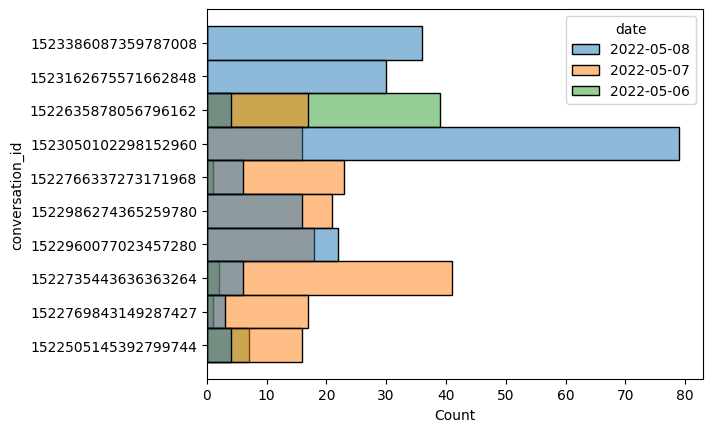

In [ ]:
#Visualizar las conversaciones más relevantes por día

sns.histplot(data = conv, y='conversation_id', hue='date')

La conversación más importante fue el día 08/05, es el hilo: *960, con 80 tweets ese día.

La seguda conversación más importante fue el día 07/05, es el hilo: *264, con 50 tweets aprox.

La tercera conversación más importante fue el día 06/05, es el hilo: *162, con 40 tweets aprox.


<AxesSubplot:xlabel='Count', ylabel='conversation_id'>

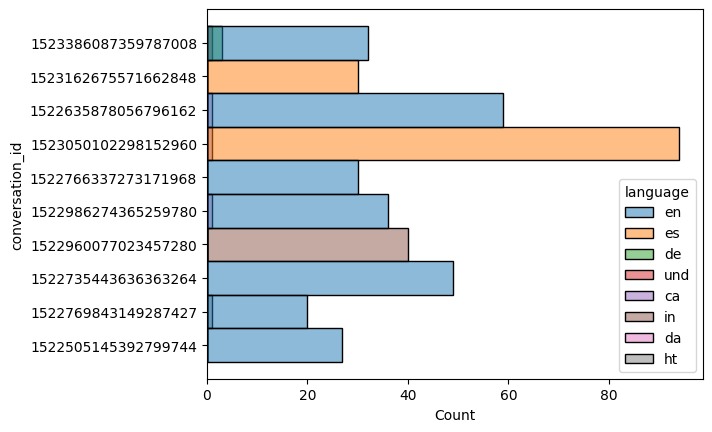

In [ ]:
#Visualizar las conversaciones más relevantes por idioma

sns.histplot(data = conv, y='conversation_id', hue='language')

Se puede ver que la mayoría de los hilos son en inglés, como habiamos visto en en los análisis anteriores, sin embargo el hilo más importante es en español, ganándole al inglés y al indi que eran los más numerosos en términos absolutos.

Las escalas horizontales que representan cantidades en los siguientes graficos, son escalas logaritmicas

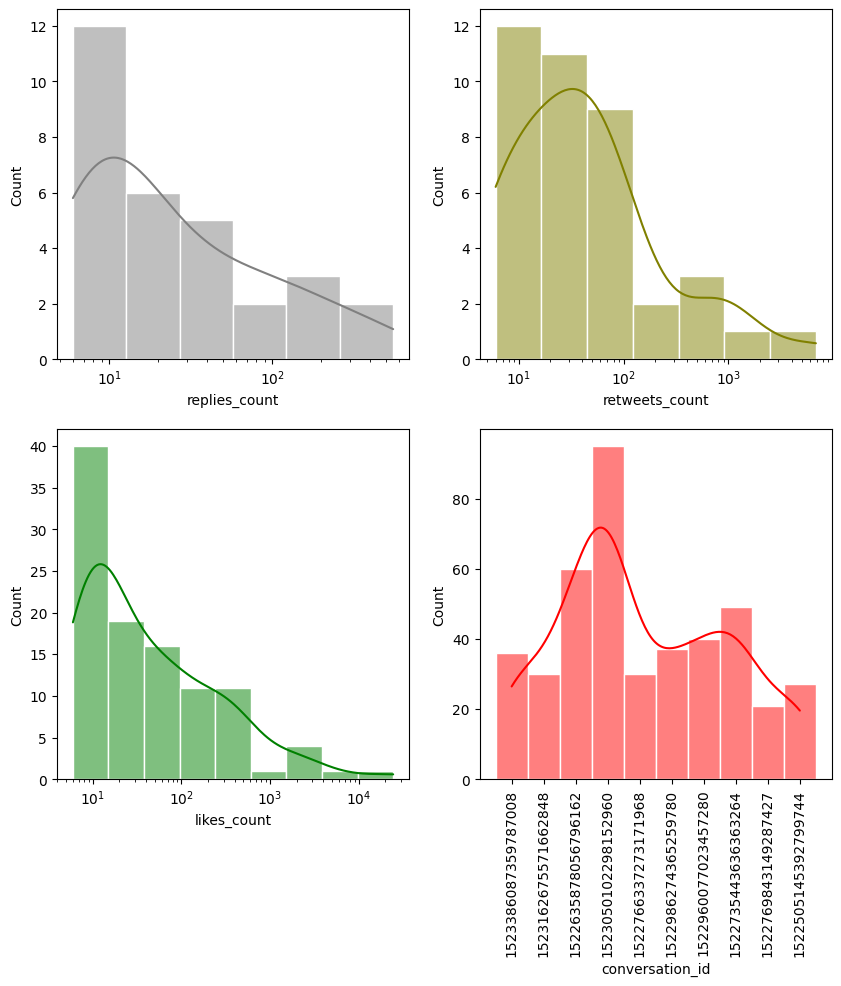

In [ ]:
ig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.grid()
sns.set_style("ticks",{'axes.grid' : True})
#sns.set_style("darkgrid")
sns.histplot(data=conv[conv['likes_count'] > 5], x="likes_count", kde=True, color="green", ax=axs[1, 0], log_scale=True)
sns.histplot(data=conv[conv['replies_count'] > 5], x="replies_count", kde=True, color="gray", ax=axs[0, 0], log_scale=True)
sns.histplot(data=conv[conv['retweets_count'] > 5], x="retweets_count", kde=True, color="olive", ax=axs[0, 1], log_scale=True)
sns.histplot(data=conv, x="conversation_id", kde=True, color="red", ax=axs[1, 1])
plt.xticks(rotation=90)
plt.grid()
plt.show()

Podemos ver cómo de manera comparativa se comprueba lo visto más arriba: la cantidad de tweets con pocos likes, retweets y respuestas son muchos. La diferencia con el primer análisis es que esta comparativa ahora está realizada sobre las 10 conversaciones más largas.

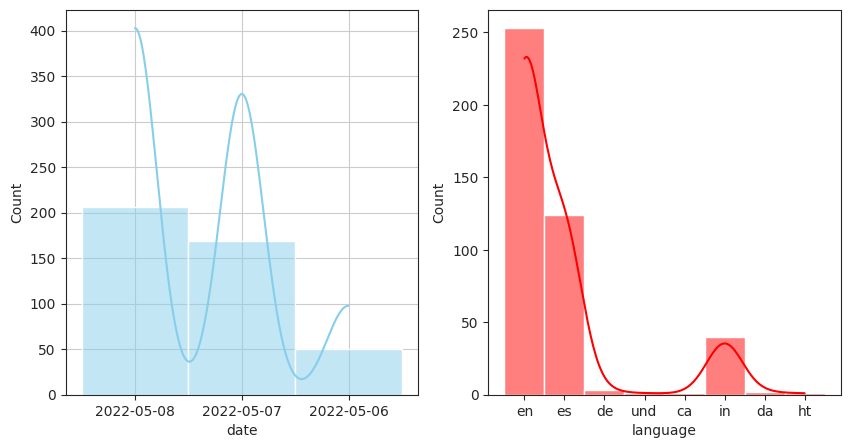

In [ ]:
# Se visualiza ahora de manera desagregada, cantidad de tweets

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=conv, x="date", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=conv, x="language", kde=True, color="red", ax=axs[1])
plt.grid()
plt.show()

In [ ]:
# Vizualizamos lo mismo que en otros gráficos
# pero la diferencia es que este gráfico es interactivo
# y se pueden ver mejor algunos detalles que en lo otros gráficos se pierden

fig = px.scatter(y=conv["likes_count"], x=conv["conversation_id"],log_y=True)
fig.show()

In [ ]:
#Vizualizamos en simultaneo: hilos, idioma, cantidad de likes y el tamaño del círculo según la cantidad de respuetas

fig = px.scatter(conv, y=conv["likes_count"], x=conv["conversation_id"], color=conv['language'], size='replies_count', log_y=True)
fig.show()

In [ ]:
#Vizualizamos en simultaneo: hilos, idioma, cantidad de likes y el tamaño del círculo según la cantidad de respuetas

fig = px.scatter(conv, y=conv["likes_count"], x=conv["conversation_id"], color=conv['date'], size='retweets_count', log_y=True)
fig.show()

In [ ]:
#Vizualizamos likes, retweets y conversación en 3d coloreado por día

fig = px.scatter_3d(conv, y="likes_count", x="conversation_id", z='retweets_count', color='date')
fig.show()

In [ ]:
#Para visualizarmejor las tres variables más correlacionadas, normalizaremos el df
# y lo graficaremos en escala logaritmica

norm = pd.DataFrame()
norm = conv[['conversation_id','replies_count','retweets_count', 'likes_count']]

In [ ]:
# Función de normalización

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [ ]:
# Aplicamos la normalización a las 3 columnas que necesitamos

df_mean_norm = mean_norm(norm[['replies_count','retweets_count', 'likes_count']])
print(df_mean_norm)

       replies_count  retweets_count  likes_count
35         -0.154412       -0.080962    -0.090071
56         -0.125540       -0.080962    -0.090071
74         -0.154412       -0.080962    -0.090071
126        -0.154412       -0.080962    -0.090071
130        -0.154412       -0.080962    -0.090071
...              ...             ...          ...
14435       3.598887        2.587947     1.557582
14669       0.018817       -0.034087     0.030925
14902      -0.067797       -0.075102    -0.057589
15656      -0.010054       -0.072173    -0.025919
17953       1.982081        2.303771     1.472316

[425 rows x 3 columns]


In [ ]:
# Graficamos el resultado:

fig2 = px.scatter_3d(norm, y="likes_count", x="replies_count", z='retweets_count', log_x=True, log_y=True, log_z=True, color='conversation_id')
fig2.show()

Se concluyó que la relevancia de las conversaciones para los usuarios de la red se relaciona con la cantidad de likes, respuestas y retwitts de cada una de ellas.

SECCION 3

# PREPROCESADO DE DATOS

In [ ]:
# IMPORTAMOS MODULOS

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
import gensim
import string

# nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
stop_words = nltk.corpus.stopwords.words(['english'])

## All Sklearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


##Todas las bibliotecas de Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Otras bibliotecas útiles
from collections import Counter
import logging
import time
import pickle
import itertools
import warnings
from wordcloud import WordCloud
lem = WordNetLemmatizer()
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2022-08-09 02:24:18.502579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-09 02:24:18.502633: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Traducción y etiquetado de los tweets

In [ ]:
df = pd.read_csv('/content/trad.csv', lineterminator='\n')

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.columns = ['text']

In [ ]:
df=df.applymap(str)

In [ ]:
def clean_text(text):
  text = re.sub(r'^RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  return text

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
df['clean_text']

0        Tried to take my children to Chi-Chi's but it ...
1         Hep A like you mention is an entirely differe...
2        UK Health Safety Authority: No evidence linkin...
3         Autoimmune hepatitis cannot spread in any way...
4         Faith??? You know what that is, vaccinated ch...
                               ...                        
49997    More countries report mysterious cases of hepa...
49998    Awaiting retraction from Covid Crank Grifter E...
49999    Details of 9 puzzling hepatitis cases rule out...
50000    Spain confirms eight cases of acute childhood ...
50001    Rare infantile hepatitis. With my partner  we ...
Name: clean_text, Length: 50002, dtype: object

In [ ]:
def get_polarity(text):
  analysis = TextBlob(text)
  result = analysis.sentiment.polarity
  time.sleep(5)
  return result 

In [ ]:
df['polarity'] = df['clean_text'].apply(get_polarity)

In [ ]:
def x_range(x):
  if x > 0:
    return 1
  elif x == 0: 
    return 0
  else:
    return -1

In [ ]:
df['result'] = df['polarity'].apply(x_range) 

In [ ]:
df.reindex()

Unnamed: 0                                                  0
0               0  Tried to take my children to Chi-Chi's but it ...
1               1  @stargazeruk7 Hep A like you mention is an ent...
2               2  UK Health Safety Authority: No evidence linkin...
3               3  @stargazeruk7 Autoimmune hepatitis cannot spre...
4               4  @GovPierluisi Faith??? You know what that is, ...
...           ...                                                ...
49997       49997  More countries report mysterious cases of hepa...
49998       49998  Awaiting retraction from Covid Crank Grifter E...
49999       49999  Details of 9 puzzling hepatitis cases rule out...
50000       50000  Spain confirms eight cases of acute childhood ...
50001       50001  Rare infantile hepatitis. With my partner @cgl...

[50002 rows x 2 columns]

PRE - PROCESANDO EL DATA

*En el código a continuación, hemos utilizado varias técnicas de procesamiento previo para eliminar palabras vacías, realizar lematización, eliminar emojis, etc., a fin de preparar nuestros datos para un análisis posterior.*

In [ ]:
tweets.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
tweets.columns = ['Text']

In [ ]:
tweets['Text'] = tweets['Text'].map(str)

In [ ]:
def decontracted(phrase):

    # específico
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n't", " not", phrase) # resultado en "ca not" cuando la oración comenzó con "can't"
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    phrase = re.sub(r"n't", " not", phrase) # resultado en "ca not" cuando la oración comenzó con "can't"
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)
    return phrase



In [ ]:
# Remove cant wont words
tweets['Text']=tweets['Text'].apply(lambda x : decontracted(x))

#Converting to Lowercase
tweets['Text']=tweets['Text'].apply(lambda x : x.lower())

In [ ]:
def cleaning(data):
    #removing url's
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #remove all hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #Removing all "@" mentions and characters which are not alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    # Tokenizing Data
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #Removal of Punctuations
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    
    #Removal of Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #Performing Lemmatization
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #Joining everything in the end
    return " ".join(text_cleaned)


*Después de todos los pasos de preprocesamiento, veremos cómo se ven nuestros datos de "Texto".*

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
tweets['Text']=tweets['Text'].apply(cleaning)
tweets.head()

Text
15973  among medicaid enrolled pregnant person opioid...
5255   hepatitis rare young child rarer still case li...
23882  start session second item agenda law viral hep...
18375  mysterious hepatitis outbreak among child baff...
12266  obviously putin fault mean else could causing ...

In [ ]:
tweets.shape

(15001, 1)

## Aplicación de TEXTBLOB

*Usaremos la biblioteca TextBlob para calcular la polaridad y la subjetividad de un tweet para ver la división de tweets positivos, negativos o neutrales.*

ESTA LIBRERÍA NOS PERMITE DE ESTA MANERA UN APRENDIZAJE NO-SUPERVIZADO

In [ ]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

*Se agregaron 2 nuevas columnas para las dos métricas mencionadas anteriormente.*

In [ ]:
# New Column 1
tweets['Subjectivity'] = tweets['Text'].apply(getSubjectivity)
# New Column 2
tweets['Polarity'] = tweets['Text'].apply(getPolarity)
tweets.head()

Text  Subjectivity  \
15973  among medicaid enrolled pregnant person opioid...      0.250000   
5255   hepatitis rare young child rarer still case li...      0.607778   
23882  start session second item agenda law viral hep...      0.000000   
18375  mysterious hepatitis outbreak among child baff...      1.000000   
12266  obviously putin fault mean else could causing ...      0.729167   

       Polarity  
15973  0.166667  
5255   0.190000  
23882  0.000000  
18375  0.000000  
12266 -0.104167

*Para textualizar y analizar estas métricas recién agregadas, agregamos etiquetas junto con una nueva columna llamada "Sentiment".*

In [ ]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweets['Sentiment'] = tweets['Polarity'].apply(getSentiment)

In [ ]:
tweets.head(20)

Text  Subjectivity  \
15973  among medicaid enrolled pregnant person opioid...      0.250000   
5255   hepatitis rare young child rarer still case li...      0.607778   
23882  start session second item agenda law viral hep...      0.000000   
18375  mysterious hepatitis outbreak among child baff...      1.000000   
12266  obviously putin fault mean else could causing ...      0.729167   
1728   perfectly normal child stroke blood clot myoca...      0.370000   
34057  mysterious pretentious acute hepatitis contagious      0.866667   
17351  general information study eight suspected case...      0.550000   
40579  vic public health list normalize serious neuro...      0.558333   
604    hepatitis outbreak could many thing one thing ...      0.550000   
47874                                 want get hepatitis      0.000000   
1544   acute hepatitis spread dpr asks government int...      0.900000   
7951   enough abso fecking lute stupidity one day get...      0.520000   
30881  would interested come harmless longcovid covid...      0.625000   
6080                               hepatitis causing dog      0.000000   
29300  learn beginning covid pandemic alert soon poss...      1.000000   
30729  although child childhood hepatitis detected dr...      0.100000   
15005                 mine hepatitis side effect vaccine      0.000000   
9123   word well would thought let go say unvaccinate...      0.000000   
37939  partnership hepatitis aid organization amp con...      0.000000   

       Polarity Sentiment  
15973  0.166667  Positive  
5255   0.190000  Positive  
23882  0.000000   Neutral  
18375  0.000000   Neutral  
12266 -0.104167  Negative  
1728  -0.200000  Negative  
34057  0.100000  Positive  
17351 -0.025000  Negative  
40579 -0.108333  Negative  
604   -0.050000  Negative  
47874  0.000000   Neutral  
1544   0.600000  Positive  
7951  -0.160000  Negative  
30881  0.162500  Positive  
6080   0.000000   Neutral  
29300  0.000000   Neutral  
30729 -0.100000  Negative  
15005  0.000000   Neutral  
9123   0.000000   Neutral  
37939  0.000000   Neutral

In [ ]:
tweets.shape

(15001, 4)

In [ ]:
#tweets.to_csv("trad_tag_pos_neg.csv")

*En el siguiente código, trazaremos las etiquetas de Sentiment para observar la distribución de los tweets.*

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

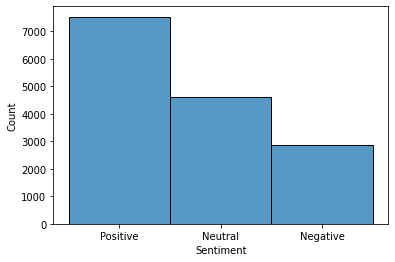

In [ ]:
sns.histplot(tweets['Sentiment'])

## Creación del dataset definitivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/drive/Othercomputers/Mi portátil/02. Programacion/Coder - Data science/Proyecto Final Coderhouse/20220508_hepatitis.csv', lineterminator='\n')
#df1 = pd.read_csv('/content/drive/Othercomputers/Mi portátil/02. Programacion/Coder - Data science/Proyecto Final Coderhouse/20220508_hepatitis (1).csv', lineterminator='\n')
df2 = pd.read_csv('/content/drive/Othercomputers/Mi portátil/02. Programacion/Coder - Data science/Proyecto Final Coderhouse/trad_tag_pos_neu_neg.csv', lineterminator='\n')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(df1.shape)
print(df2.shape)

(50002, 36)
(50002, 5)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50002 non-null  int64  
 1   conversation_id  50002 non-null  int64  
 2   created_at       50002 non-null  object 
 3   date             50002 non-null  object 
 4   time             50002 non-null  object 
 5   timezone         50002 non-null  int64  
 6   user_id          50002 non-null  int64  
 7   username         50002 non-null  object 
 8   name             50001 non-null  object 
 9   place            34 non-null     object 
 10  tweet            50002 non-null  object 
 11  language         50002 non-null  object 
 12  mentions         50002 non-null  object 
 13  urls             50002 non-null  object 
 14  photos           50002 non-null  object 
 15  replies_count    50002 non-null  int64  
 16  retweets_count   50002 non-null  int64  
 17  likes_count 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50002 non-null  int64  
 1   Text          49630 non-null  object 
 2   Subjectivity  50002 non-null  float64
 3   Polarity      50002 non-null  float64
 4   Sentiment     50002 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.9+ MB


In [ ]:
df1.head(3)

id      conversation_id               created_at  \
0  1523479063272525824  1523479063272525824  2022-05-08 22:44:48 -03   
1  1523479009694158848  1523418175878037504  2022-05-08 22:44:35 -03   
2  1523478947115139072  1523478947115139072  2022-05-08 22:44:20 -03   

         date      time  timezone              user_id        username  \
0  2022-05-08  22:44:48      -300             49024508    onionweigher   
1  2022-05-08  22:44:35      -300           2726837169  griffinjones25   
2  2022-05-08  22:44:20      -300  1452730505787551750    ideallyanews   

                name place  ... geo source user_rt_id user_rt retweet_id  \
0  Onion Weigher 🧅⚖️   NaN  ... NaN    NaN        NaN     NaN        NaN   
1                 GJ   NaN  ... NaN    NaN        NaN     NaN        NaN   
2       IdeallyaNews   NaN  ... NaN    NaN        NaN     NaN        NaN   

                                            reply_to  retweet_date  translate  \
0                                                 []           NaN        NaN   
1  [{'screen_name': 'stargazeruk7', 'name': 'Nata...           NaN        NaN   
2                                                 []           NaN        NaN   

  trans_src trans_dest\r  
0       NaN           \r  
1       NaN           \r  
2       NaN           \r  

[3 rows x 36 columns]

In [ ]:
df2.head(3)

Unnamed: 0                                               Text  \
0           0  tried take child chi chi wasteland sneeze guar...   
1           1  hep like mention entirely different disease au...   
2           2  uk health safety authority evidence linking ch...   

   Subjectivity  Polarity Sentiment  
0           0.5       0.0   Neutral  
1           0.6       0.0   Neutral  
2           0.6      -0.1  Negative

In [ ]:
df3 = pd.concat([df1, df2], axis=1, join='inner')
df3.shape

(50002, 41)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50002 non-null  int64  
 1   conversation_id  50002 non-null  int64  
 2   created_at       50002 non-null  object 
 3   date             50002 non-null  object 
 4   time             50002 non-null  object 
 5   timezone         50002 non-null  int64  
 6   user_id          50002 non-null  int64  
 7   username         50002 non-null  object 
 8   name             50001 non-null  object 
 9   place            34 non-null     object 
 10  tweet            50002 non-null  object 
 11  language         50002 non-null  object 
 12  mentions         50002 non-null  object 
 13  urls             50002 non-null  object 
 14  photos           50002 non-null  object 
 15  replies_count    50002 non-null  int64  
 16  retweets_count   50002 non-null  int64  
 17  likes_count 

In [ ]:
df3.head(30)

id      conversation_id               created_at  \
0   1523479063272525824  1523479063272525824  2022-05-08 22:44:48 -03   
1   1523479009694158848  1523418175878037504  2022-05-08 22:44:35 -03   
2   1523478947115139072  1523478947115139072  2022-05-08 22:44:20 -03   
3   1523478841125048320  1523418175878037504  2022-05-08 22:43:55 -03   
4   1523478649827078144  1523425745657245697  2022-05-08 22:43:09 -03   
5   1523478590930944000  1523474108385665026  2022-05-08 22:42:55 -03   
6   1523478301225803776  1522650151793295361  2022-05-08 22:41:46 -03   
7   1523478214881923073  1523423691136110593  2022-05-08 22:41:25 -03   
8   1523478145844015104  1523134991315648513  2022-05-08 22:41:09 -03   
9   1523478059248406528  1523476440884584448  2022-05-08 22:40:48 -03   
10  1523478051585400832  1523478051585400832  2022-05-08 22:40:47 -03   
11  1523477986720161792  1523461446184873984  2022-05-08 22:40:31 -03   
12  1523477982882721793  1523477982882721793  2022-05-08 22:40:30 -03   
13  1523477882764374018  1523477882764374018  2022-05-08 22:40:06 -03   
14  1523477712815329282  1522233907076292611  2022-05-08 22:39:26 -03   
15  1523477690913017857  1523477690913017857  2022-05-08 22:39:21 -03   
16  1523477374217555968  1523477374217555968  2022-05-08 22:38:05 -03   
17  1523477229862531072  1523477229862531072  2022-05-08 22:37:31 -03   
18  1523477195334725632  1523477186786643968  2022-05-08 22:37:22 -03   
19  1523477186786643968  1523477186786643968  2022-05-08 22:37:20 -03   
20  1523477004229967872  1523477004229967872  2022-05-08 22:36:37 -03   
21  1523476986982633473  1523476986982633473  2022-05-08 22:36:33 -03   
22  1523476751543808002  1523475546801201154  2022-05-08 22:35:37 -03   
23  1523476620530503680  1523476562233888769  2022-05-08 22:35:05 -03   
24  1523476594710302721  1523413107552313344  2022-05-08 22:34:59 -03   
25  1523476487222882305  1523476487222882305  2022-05-08 22:34:34 -03   
26  1523476440884584448  1523476440884584448  2022-05-08 22:34:22 -03   
27  1523476386794549249  1523446585115373569  2022-05-08 22:34:10 -03   
28  1523476302325764098  1523451870513037312  2022-05-08 22:33:49 -03   
29  1523476243902984193  1523476243902984193  2022-05-08 22:33:36 -03   

          date      time  timezone              user_id         username  \
0   2022-05-08  22:44:48      -300             49024508     onionweigher   
1   2022-05-08  22:44:35      -300           2726837169   griffinjones25   
2   2022-05-08  22:44:20      -300  1452730505787551750     ideallyanews   
3   2022-05-08  22:43:55      -300           2726837169   griffinjones25   
4   2022-05-08  22:43:09      -300  1467606239119089676  olganie35346372   
5   2022-05-08  22:42:55      -300  1458394902421663750    yanharyanto11   
6   2022-05-08  22:41:46      -300  1261863577843089408    sofivoltolini   
7   2022-05-08  22:41:25      -300            225047887          mamujam   
8   2022-05-08  22:41:09      -300  1484332345289154560    lximenezsarro   
9   2022-05-08  22:40:48      -300   797482253521747968    hepatitisatoz   
10  2022-05-08  22:40:47      -300  1356999943932706817       candralepi   
11  2022-05-08  22:40:31      -300  1362632064005193728  lindsay91934218   
12  2022-05-08  22:40:30      -300  1356999943932706817       candralepi   
13  2022-05-08  22:40:06      -300            368933390         kakmidah   
14  2022-05-08  22:39:26      -300             50878535   freethesesheep   
15  2022-05-08  22:39:21      -300  1366644453688053762     jabaronline1   
16  2022-05-08  22:38:05      -300             71436318         kompastv   
17  2022-05-08  22:37:31      -300            104446991      detikhealth   
18  2022-05-08  22:37:22      -300           4721766133       pnugroho28   
19  2022-05-08  22:37:20      -300           4721766133       pnugroho28   
20  2022-05-08  22:36:37      -300  1328129804437237761    peterhall2121   
21  2022-05-08  22:36:33      -300            102040330        jccortesm   
22  2022-

In [ ]:
df3.dropna(axis=1, inplace=True, how='all')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50002 non-null  int64  
 1   conversation_id  50002 non-null  int64  
 2   created_at       50002 non-null  object 
 3   date             50002 non-null  object 
 4   time             50002 non-null  object 
 5   timezone         50002 non-null  int64  
 6   user_id          50002 non-null  int64  
 7   username         50002 non-null  object 
 8   name             50001 non-null  object 
 9   place            34 non-null     object 
 10  tweet            50002 non-null  object 
 11  language         50002 non-null  object 
 12  mentions         50002 non-null  object 
 13  urls             50002 non-null  object 
 14  photos           50002 non-null  object 
 15  replies_count    50002 non-null  int64  
 16  retweets_count   50002 non-null  int64  
 17  likes_count 

In [ ]:
df3.shape

(50002, 32)

In [ ]:
print(df3.iloc[40001])

id                                               1521297440133070850
conversation_id                                  1521214334654943232
created_at                                   2022-05-02 22:15:48 -03
date                                                      2022-05-02
time                                                        22:15:48
timezone                                                        -300
user_id                                                    114679797
username                                                    abimelek
name                                               Abimelek Betanzos
place                                                            NaN
tweet              @red_pill_junkie @lilaabed @Forbes Sí, Justo a...
language                                                          es
mentions                                                          []
urls                                                              []
photos                            

In [ ]:
df3.drop(df3.columns[[9, 10, 22, 24, 26, 27]], axis='columns', inplace=True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50002 non-null  int64  
 1   conversation_id  50002 non-null  int64  
 2   created_at       50002 non-null  object 
 3   date             50002 non-null  object 
 4   time             50002 non-null  object 
 5   timezone         50002 non-null  int64  
 6   user_id          50002 non-null  int64  
 7   username         50002 non-null  object 
 8   name             50001 non-null  object 
 9   language         50002 non-null  object 
 10  mentions         50002 non-null  object 
 11  urls             50002 non-null  object 
 12  photos           50002 non-null  object 
 13  replies_count    50002 non-null  int64  
 14  retweets_count   50002 non-null  int64  
 15  likes_count      50002 non-null  int64  
 16  hashtags         50002 non-null  object 
 17  cashtags    

In [ ]:
df3.shape

(50002, 26)

In [ ]:
indexnull = df3[df3['Text'].isnull() ].index

In [ ]:
df3.drop(indexnull , inplace=True)

In [ ]:
df3.shape

(49630, 26)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49630 entries, 0 to 50001
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               49630 non-null  int64  
 1   conversation_id  49630 non-null  int64  
 2   created_at       49630 non-null  object 
 3   date             49630 non-null  object 
 4   time             49630 non-null  object 
 5   timezone         49630 non-null  int64  
 6   user_id          49630 non-null  int64  
 7   username         49630 non-null  object 
 8   name             49629 non-null  object 
 9   language         49630 non-null  object 
 10  mentions         49630 non-null  object 
 11  urls             49630 non-null  object 
 12  photos           49630 non-null  object 
 13  replies_count    49630 non-null  int64  
 14  retweets_count   49630 non-null  int64  
 15  likes_count      49630 non-null  int64  
 16  hashtags         49630 non-null  object 
 17  cashtags    

In [ ]:
df3.to_csv("dataset_definitivo.csv")

SECCION 4

# APLICACION DE LOS MODELOS DE ML

### Leyendo el RAW DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweet=pd.read_csv('/content/drive/Othercomputers/Mi portátil/02. Programacion/Coder - Data science/Proyecto Final Coderhouse/dataset_definitivo.csv', lineterminator='\n')

In [ ]:
#tweet=pd.read_csv('/content/dataset_definitivo.csv', lineterminator='\n')

In [ ]:
#Sampleamos si por cuestiones de memoria RAM se hace pesado el analisis

tweets = tweet.sample(frac = 1, ignore_index=True, random_state=7 )

In [ ]:
tweets.shape

(49630, 27)

In [ ]:
df = tweets

In [ ]:
type(df)

pandas.core.frame.DataFrame

### Enfoques de análisis de texto


    1) BOW
            - ML Models used:
                1.1) Naive Bayes Model
                1.2) KNN Model
                1.3) Decision Tree Model
                1.4) Random Forest Model
                1.5) SVC Model
                1.6) AdaBoostClassifier
                1.7) Xgboost
                1.8) Lightgbm
                1.9) GradientBoostingClassifier
    2) TF-IDF
            - ML Models Used
                2.1) Naive Bayes Model
                2.2) KNN Model
                2.3) Decision Tree Model
                2.4) Random Forest Model
                2.5) SVC Model
                2.6) AdaBoostClassifier
                2.7) Xgboost
                2.8) Lightgbm
                2.9) GradientBoostingClassifier

## 1) ML MODELOS CON BOLSAS DE PALABRAS

Estos tipos de modelos trabajan con una bolsa de palabras 'general' y de acuerdo a eso se hace el análisis de sentimientos

Creamos la bolsa de palabras/corpus para el BOW Technique

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'time',
       'timezone', 'user_id', 'username', 'name', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'video', 'reply_to', 'Text',
       'Subjectivity', 'Polarity', 'Sentiment'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49630 entries, 0 to 49629
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       49630 non-null  int64  
 1   id               49630 non-null  int64  
 2   conversation_id  49630 non-null  int64  
 3   created_at       49630 non-null  object 
 4   date             49630 non-null  object 
 5   time             49630 non-null  object 
 6   timezone         49630 non-null  int64  
 7   user_id          49630 non-null  int64  
 8   username         49630 non-null  object 
 9   name             49629 non-null  object 
 10  language         49630 non-null  object 
 11  mentions         49630 non-null  object 
 12  urls             49630 non-null  object 
 13  photos           49630 non-null  object 
 14  replies_count    49630 non-null  int64  
 15  retweets_count   49630 non-null  int64  
 16  likes_count      49630 non-null  int64  
 17  hashtags    

In [ ]:
corpus = [] # Construir una nueva lista para todas las palabras de todos los tweets

# El corpus es una colección de texto y un término común utilizado en PNL
for i in range (0, len(df['Text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['Text'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
cvec = CountVectorizer(max_features = 1000)
X = cvec.fit_transform(corpus).todense()
y = df['Sentiment'].values

In [ ]:
print(X)
print(y)

print(X.shape)
print(y.shape)

print(type(X))
print(type(y))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['Positive' 'Neutral' 'Positive' ... 'Positive' 'Positive' 'Neutral']
(49630, 1000)
(49630,)
<class 'numpy.matrix'>
<class 'numpy.ndarray'>


División de datos en conjuntos de datos de prueba y entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.20, random_state = 0)

### 1.1) Naive Bayes Model

              precision    recall  f1-score   support

    Negative       0.52      0.68      0.59      1965
     Neutral       0.60      0.91      0.72      2997
    Positive       0.89      0.50      0.64      4964

    accuracy                           0.66      9926
   macro avg       0.67      0.70      0.65      9926
weighted avg       0.73      0.66      0.65      9926

El indice de Accuracy es: 0.66
El Accuracy en los datos de entrenamiento es de: 0.67


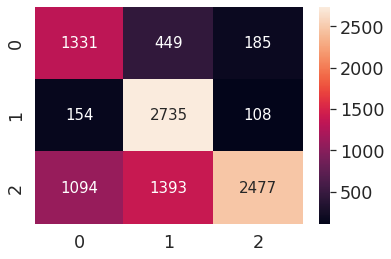

In [ ]:
classifierused = GaussianNB() # Definiendo el clasificador 
classifierused.fit(X_train, y_train) # Ajustando el clasificador al conjunto de datos de entrenamiento

# Prediccion de resultados
y_pred = classifierused.predict(X_test)

# Generando la matriz de confusión
cmatrix = confusion_matrix(y_test, y_pred)

# Generando los indices de exactitud
accuracy = accuracy_score(y_test, y_pred)

#Preparando el mapa de calor de la matriz de confusión
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

# Mostrando el reporte de clasificacion para precision, recall y F1
print(classification_report(y_test, y_pred))

#Mostrando indices de exactitud
print("El indice de Accuracy es:",round(accuracy,2))
print("El Accuracy en los datos de entrenamiento es de:", round(classifierused.score(X_train,y_train),2))

### 1.2) KNN Model

El indice de Accuracy de test es: 0.62
El Accuracy en los datos de entrenamiento es de: 0.63
              precision    recall  f1-score   support

    Negative       0.78      0.23      0.36      1965
     Neutral       0.45      0.98      0.62      2997
    Positive       0.95      0.55      0.70      4964

    accuracy                           0.62      9926
   macro avg       0.73      0.59      0.56      9926
weighted avg       0.77      0.62      0.61      9926



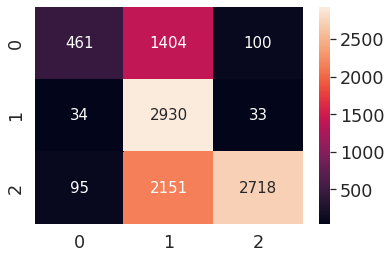

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)  # Definiendo el clasificador
knn.fit(X_train, y_train) # Ajustando el clasificador  al conjunto de entrenamiento

# Prediccion de resultados
y_pred=knn.predict(X_test)

# Generando la matriz de confusion
cmatrix = confusion_matrix(y_test, y_pred)

# Generando indices de exactitud
accuracy = accuracy_score(y_test, y_pred)

df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

# Mostrando resultados
print("El indice de Accuracy de test es:",round(accuracy,2))
print("El Accuracy en los datos de entrenamiento es de:", round(knn.score(X_train,y_train),2))


# Mostrando informe de clasificacion para Precision, recall y F1
print(classification_report(y_test, y_pred))

In [ ]:
# veamos como le va a nuestro modelo variando la cantidad de vecinos y el tipo de peso
# valores_k = list(range(1,50,4))
# resultados_train_u = []
# resultados_test_u  = []
# resultados_train_w = []
# resultados_test_w  = []

# for k in valores_k:
#     # instanciamos el modelo uniforme
#     clf_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
#     clf_u.fit(X_train, y_train)
#     y_train_pred = clf_u.predict(X_train)
#     y_pred = clf_u.predict(X_test)
#     resultados_train_u.append(accuracy_score(y_train, y_train_pred))
#     resultados_test_u.append(accuracy_score(y_test, y_pred))

#     clf_w = KNeighborsClassifier(n_neighbors=k, weights='distance')
#     clf_w.fit(X_train, y_train)
#     y_train_pred = clf_w.predict(X_train)
#     y_pred = clf_w.predict(X_test)
#     resultados_train_w.append(accuracy_score(y_train, y_train_pred))
#     resultados_test_w.append(accuracy_score(y_test, y_pred))

In [ ]:
# veamos que paso en cada caso
# f, ax = plt.subplots(1,2,figsize=(14,5),sharey=True)
# ax[0].plot(valores_k, resultados_train_u, valores_k, resultados_test_u);
# ax[0].legend(['pesos uniformes - train', 'pesos uniformes - test']);
# ax[0].set(xlabel='k',ylabel='accuracy');

# ax[1].plot(valores_k, resultados_train_w, valores_k, resultados_test_w);
# ax[1].legend(['pesos distancia - train', 'pesos distancia - test']);
# ax[1].set(xlabel='k');

### 1.3) Decision Tree Model

El indice de Accuracy de test es: 0.85
El Accuracy en los datos de entrenamiento es de: 1.0
              precision    recall  f1-score   support

    Negative       0.75      0.73      0.74      1965
     Neutral       0.85      0.87      0.86      2997
    Positive       0.89      0.89      0.89      4964

    accuracy                           0.85      9926
   macro avg       0.83      0.83      0.83      9926
weighted avg       0.85      0.85      0.85      9926



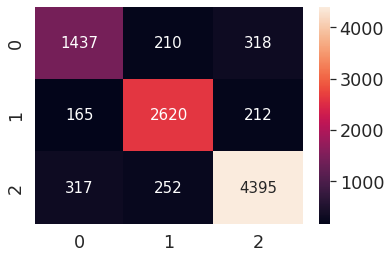

In [ ]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 0) # Definiendo el clasificador
dt_clf.fit(X_train, y_train)  # Ajustando el clasificador  al conjunto de entrenamiento

# Predeciendo los resultados a continuación
y_pred = dt_clf.predict(X_test)


# Generando la Matrix de Confusión
cmatrix = confusion_matrix(y_test, y_pred)

# Genernado Accuracy Scores
accuracy = accuracy_score(y_test, y_pred)

#Preparando Confusion Matrix Heatmap
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Imprimiento los resultados
print("El indice de Accuracy de test es:",round(accuracy,2))
print("El Accuracy en los datos de entrenamiento es de:", round(dt_clf.score(X_train,y_train),2))


# Mostrando Informe de clasificación para precisión, recuperación y puntaje F1
print(classification_report(y_test, y_pred))

In [ ]:
profundidad = list(range(1,20))
resultados_train = []
resultados_test  = []

for depth in profundidad:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0)
    arbol.fit(X_train, y_train)
    y_train_pred = arbol.predict(X_train)
    y_pred = arbol.predict(X_test)
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_pred))

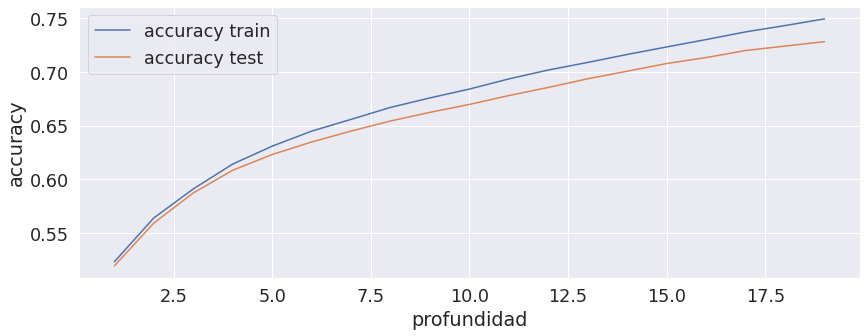

In [ ]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
ax.plot(profundidad, resultados_train, profundidad, resultados_test);
ax.legend(['accuracy train', 'accuracy test']);
ax.set(xlabel='profundidad',ylabel='accuracy');

### 1.4) Random Forest Model

El indice de Accuracy de test es 0.87
El Accuracy en los datos de entrenamiento es de: 0.99
              precision    recall  f1-score   support

    Negative       0.81      0.74      0.78      1965
     Neutral       0.84      0.93      0.88      2997
    Positive       0.92      0.89      0.91      4964

    accuracy                           0.87      9926
   macro avg       0.86      0.85      0.85      9926
weighted avg       0.87      0.87      0.87      9926



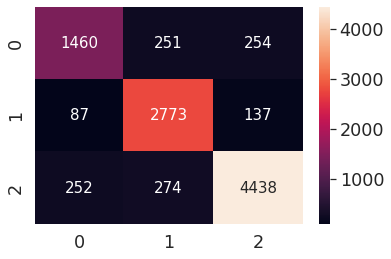

In [ ]:
# Definiendo el clasificador
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0) 

model.fit(X_train, y_train)     # Fitting Classifier to the Training Data Set

# Prediccion de resultados
y_pred = model.predict(X_test)

# Generando la matriz de confusion
cmatrix = confusion_matrix(y_test, y_pred)

# Generando indices de exactitud
accuracy = accuracy_score(y_test, y_pred)

#Preparando mapa de calor de la matriz de confusion
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)


#Mostrando resultados
print("El indice de Accuracy de test es",round(accuracy,2))
print("El Accuracy en los datos de entrenamiento es de:", round(model.score(X_train,y_train),2))


# Mostrando Informe de clasificación para precisión, recuperación y puntaje F1
print(classification_report(y_test, y_pred))


In [ ]:
# Graficaremos estimadores versus accuracy

# estimadores = list(range(10,200,10))
# resultados_train = []
# resultados_test  = []

# for estimador in estimadores:
#     # instanciamos el modelo uniforme
#     model = RandomForestClassifier(n_estimators = estimador, criterion = 'entropy', random_state=0)
#     model.fit(X_train, y_train)
#     y_train_pred = model.predict(X_train)
#     y_pred = model.predict(X_test)
#     resultados_train.append(accuracy_score(y_train, y_train_pred))
#     resultados_test.append(accuracy_score(y_test, y_pred))

In [ ]:
# veamos que paso en cada caso
# f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
# ax.plot(estimadores, resultados_train, estimadores, resultados_test);
# ax.legend(['accuracy train', 'accuracy test']);
# ax.set(xlabel='estimadores',ylabel='accuracy');

### 1.5) SVC Model

El indice de Accuracy de test es: 0.89
El Accuracy en los datos de entrenamiento es de: 0.9
              precision    recall  f1-score   support

    Negative       0.87      0.77      0.81      1965
     Neutral       0.84      0.95      0.89      2997
    Positive       0.94      0.91      0.92      4964

    accuracy                           0.89      9926
   macro avg       0.88      0.87      0.88      9926
weighted avg       0.89      0.89      0.89      9926



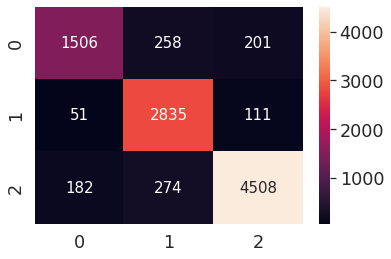

In [ ]:
clf = SVC(kernel = 'linear')    # Definiendo el clasificador

clf.fit(X_train, y_train)      # Ajustando el clasificador  al conjunto de entrenamiento

# Prediccion de resultados
y_pred = clf.predict(X_test)

# Generando la matriz de confusionx
cmatrix = confusion_matrix(y_test, y_pred)

# Generando indices de exactitud
accuracy = accuracy_score(y_test, y_pred)

#Preparando mapa de calor de la matriz de confusion
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Mostrando resultados
print("El indice de Accuracy de test es:",round(accuracy,2))
print("El Accuracy en los datos de entrenamiento es de:", round(clf.score(X_train,y_train),2))

# Mostrando informe de clasificación para precisión, recuperación y puntaje F1
print(classification_report(y_test, y_pred))

Dado que el modelo que da mejores resultados es SVM, aquí podría aplicarse el SerchCV para optimizar hiperparámetros. No lo hacemos porque demora mucho el tiempo de ejecución.

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# # Grilla para Random Search
# param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}

# #Aplicamos la grilla al modelo
# model = RandomizedSearchCV(SVC(), param_grid, n_iter=20, random_state=0, cv=5)
# model.fit(X_train, y_train)

# print("Mejores parametros: "+str(model.best_params_))
# print("Mejor Score: "+str(model.best_score_)+'\n')

### 1.6) AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Accuracy on test Dataset is: 0.81
Accuracy on training Dataset is: 0.9
              precision    recall  f1-score   support

    Negative       0.85      0.61      0.71      1965
     Neutral       0.67      0.97      0.79      2997
    Positive       0.93      0.79      0.85      4964

    accuracy                           0.81      9926
   macro avg       0.82      0.79      0.79      9926
weighted avg       0.84      0.81      0.81      9926



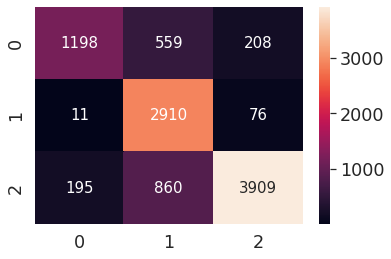

In [ ]:
# Creamos un AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)

#Fiteamos el modelo
model = ada.fit(X_train, y_train)

#Predicción!
y_pred = model.predict(X_test)

# Generating Confusion Matrix
cmatrix = confusion_matrix(y_test, y_pred)

# Generating Accuracy Scores
accuracy = accuracy_score(y_test, y_pred)

#Preparing Confusion Matrix Heatmap
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Printing results
print("Accuracy on test Dataset is:",round(accuracy,2))
print("Accuracy on training Dataset is:", round(clf.score(X_train,y_train),2))

# Printing Classification Report for Precision, recall and F1 Score
print(classification_report(y_test, y_pred))

### 1.7) Xgboost - Clasificación

In [ ]:
import xgboost as xgb #pip install xgboost

Accuracy on test Dataset is: 0.81
Accuracy on training Dataset is: 0.9
              precision    recall  f1-score   support

    Negative       0.85      0.61      0.71      1965
     Neutral       0.67      0.97      0.79      2997
    Positive       0.93      0.79      0.85      4964

    accuracy                           0.81      9926
   macro avg       0.82      0.79      0.79      9926
weighted avg       0.84      0.81      0.81      9926



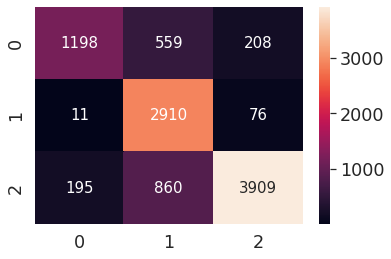

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123)

clf_xgb.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test

# Generating Confusion Matrix
cmatrix = confusion_matrix(y_test, y_pred)

# Generating Accuracy Scores
accuracy = accuracy_score(y_test, y_pred)

#Preparing Confusion Matrix Heatmap
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Printing results
print("Accuracy on test Dataset is:",round(accuracy,2))
print("Accuracy on training Dataset is:", round(clf.score(X_train,y_train),2))

# Printing Classification Report for Precision, recall and F1 Score
print(classification_report(y_test, y_pred))

### 1.8) Lightgbm - Clasificación

Accuracy on test Dataset is: 0.9
Accuracy on training Dataset is: 0.9
              precision    recall  f1-score   support

    Negative       0.89      0.77      0.82      1965
     Neutral       0.83      0.97      0.89      2997
    Positive       0.95      0.90      0.92      4964

    accuracy                           0.90      9926
   macro avg       0.89      0.88      0.88      9926
weighted avg       0.90      0.90      0.90      9926



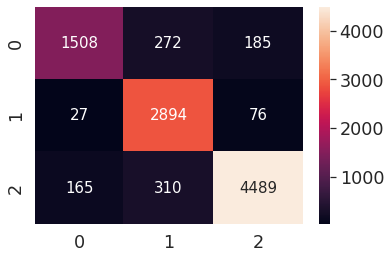

In [ ]:
import lightgbm as lgb #pip install lightgbm
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

# Generating Confusion Matrix
cmatrix = confusion_matrix(y_test, y_pred)

# Generating Accuracy Scores
accuracy = accuracy_score(y_test, y_pred)

#Preparing Confusion Matrix Heatmap
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Printing results
print("Accuracy on test Dataset is:",round(accuracy,2))
print("Accuracy on training Dataset is:", round(clf.score(X_train,y_train),2))

# Printing Classification Report for Precision, recall and F1 Score
print(classification_report(y_test, y_pred))

### 1.9  GradientBoostingClassifier

Accuracy on test Dataset is: 0.82
Accuracy on training Dataset is: 0.9
              precision    recall  f1-score   support

    Negative       0.85      0.58      0.69      1965
     Neutral       0.69      0.97      0.81      2997
    Positive       0.92      0.82      0.87      4964

    accuracy                           0.82      9926
   macro avg       0.82      0.79      0.79      9926
weighted avg       0.84      0.82      0.81      9926



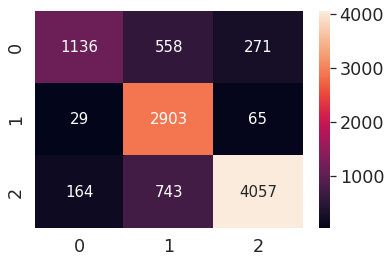

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)
y_pred=gbrt.predict(X_test)

# Generating Confusion Matrix
cmatrix = confusion_matrix(y_test, y_pred)

# Generating Accuracy Scores
accuracy = accuracy_score(y_test, y_pred)

#Preparing Confusion Matrix Heatmap
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Printing results
print("Accuracy on test Dataset is:",round(accuracy,2))
print("Accuracy on training Dataset is:", round(clf.score(X_train,y_train),2))

# Printing Classification Report for Precision, recall and F1 Score
print(classification_report(y_test, y_pred))

## 2) MODELOS ML CON TF-IDF

Creando Corpus 2 usando TF-IDF Technique

Este tipo de modelos trabaja con la frecuencia de las palabras respecto al tweet y respecto a todos los tweet.

In [ ]:
vectorizer = TfidfVectorizer (max_features = 1000)
corpus = vectorizer.fit_transform(df['Text']).toarray()
X = corpus
y = df.iloc[:,2].values

### 2.1) Naive Bayes Model

El indice de Accuracy de test es: 0.66
El Accuracy en los datos de entrenamiento es de: 0.67
              precision    recall  f1-score   support

    Negative       0.52      0.68      0.59      1965
     Neutral       0.60      0.91      0.72      2997
    Positive       0.89      0.50      0.64      4964

    accuracy                           0.66      9926
   macro avg       0.67      0.70      0.65      9926
weighted avg       0.73      0.66      0.65      9926



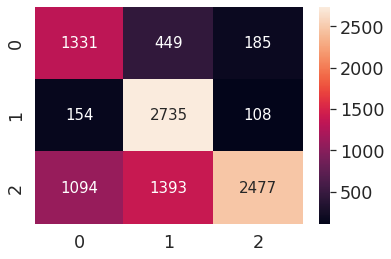

In [ ]:
classifierused = GaussianNB()   # Definiendo el clasificador
classifierused.fit(X_train, y_train)     # Ajustando el clasificador  al conjunto de entrenamiento

# Prediccion de resultados
y_pred = classifierused.predict(X_test)

# Generando la matriz de confusion
cmatrix = confusion_matrix(y_test, y_pred)

# Generando indices de exactitud
accuracy = accuracy_score(y_test, y_pred)

#Preparando mapa de calor de la matriz de confusion
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Mostrando resultados
print("El indice de Accuracy de test es:",round(accuracy,2))
print("El Accuracy en los datos de entrenamiento es de:", round(classifierused.score(X_train,y_train),2))


#Mostrando informe de clasificación para precisión, recuperación y puntaje F1
print(classification_report(y_test, y_pred))

### 2.2) KNN Model

El indice de Accuracy de test es: 0.61
El Accuracy en los datos de entrenamiento es de: 0.62
              precision    recall  f1-score   support

    Negative       0.79      0.21      0.33      1965
     Neutral       0.44      0.98      0.61      2997
    Positive       0.95      0.54      0.69      4964

    accuracy                           0.61      9926
   macro avg       0.73      0.57      0.54      9926
weighted avg       0.77      0.61      0.59      9926



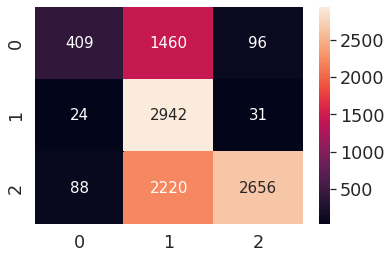

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)  # Definiendo el clasificador
knn.fit(X_train, y_train) # Ajustando el clasificador  al conjunto de entrenamiento

# Prediccion de resultados
y_pred=knn.predict(X_test)

# Generando la matriz de confusion
cmatrix = confusion_matrix(y_test, y_pred)

# Generando indices de exactitud
accuracy = accuracy_score(y_test, y_pred)

df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Mostrando resultados
print("El indice de Accuracy de test es:",round(accuracy,2))
print("El Accuracy en los datos de entrenamiento es de:", round(knn.score(X_train,y_train),2))

# Mostrando informe de clasificación para precisión, recuperación y puntaje F1
print(classification_report(y_test, y_pred))

In [ ]:
# veamos como le va a nuestro modelo variando la cantidad de vecinos y el tipo de peso
# valores_k = list(range(1,50,4))
# resultados_train_u = []
# resultados_test_u  = []
# resultados_train_w = []
# resultados_test_w  = []

# for k in valores_k:
#     # instanciamos el modelo uniforme
#     clf_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
#     clf_u.fit(X_train, y_train)
#     y_train_pred = clf_u.predict(X_train)
#     y_pred = clf_u.predict(X_test)
#     resultados_train_u.append(accuracy_score(y_train, y_train_pred))
#     resultados_test_u.append(accuracy_score(y_test, y_pred))

#     clf_w = KNeighborsClassifier(n_neighbors=k, weights='distance')
#     clf_w.fit(X_train, y_train)
#     y_train_pred = clf_w.predict(X_train)
#     y_pred = clf_w.predict(X_test)
#     resultados_train_w.append(accuracy_score(y_train, y_train_pred))
#     resultados_test_w.append(accuracy_score(y_test, y_pred))

In [ ]:
# veamos que paso en cada caso
# f, ax = plt.subplots(1,2,figsize=(14,5),sharey=True)
# ax[0].plot(valores_k, resultados_train_u, valores_k, resultados_test_u);
# ax[0].legend(['pesos uniformes - train', 'pesos uniformes - test']);
# ax[0].set(xlabel='k',ylabel='accuracy');

# ax[1].plot(valores_k, resultados_train_w, valores_k, resultados_test_w);
# ax[1].legend(['pesos distancia - train', 'pesos distancia - test']);
# ax[1].set(xlabel='k');

### 2.3) Decision Tree Model

El indice de Accuracy de test es: 0.85
El Accuracy en los datos de entrenamiento es de: 1.0
              precision    recall  f1-score   support

    Negative       0.75      0.73      0.74      1965
     Neutral       0.85      0.87      0.86      2997
    Positive       0.89      0.89      0.89      4964

    accuracy                           0.85      9926
   macro avg       0.83      0.83      0.83      9926
weighted avg       0.85      0.85      0.85      9926



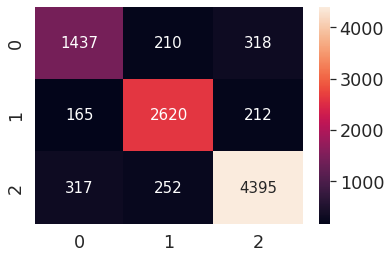

In [ ]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 0) # Definiendo el clasificador
dt_clf.fit(X_train, y_train)  # Ajustando el clasificador  al conjunto de entrenamiento

# Prediccion de resultados
y_pred = dt_clf.predict(X_test)


# Generando la matriz de confusion
cmatrix = confusion_matrix(y_test, y_pred)

# Generando indices de exactitud
accuracy = accuracy_score(y_test, y_pred)

#Preparando mapa de calor de la matriz de confusion
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Mostrando resultados
print("El indice de Accuracy de test es:",round(accuracy,2))
print("El Accuracy en los datos de entrenamiento es de:", round(dt_clf.score(X_train,y_train),2))


# Mostrando informe de clasificación para precisión, recuperación y puntaje F1
print(classification_report(y_test, y_pred))

In [ ]:
profundidad = list(range(1,20))
resultados_train = []
resultados_test  = []

for depth in profundidad:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0)
    arbol.fit(X_train, y_train)
    y_train_pred = arbol.predict(X_train)
    y_pred = arbol.predict(X_test)
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_pred))

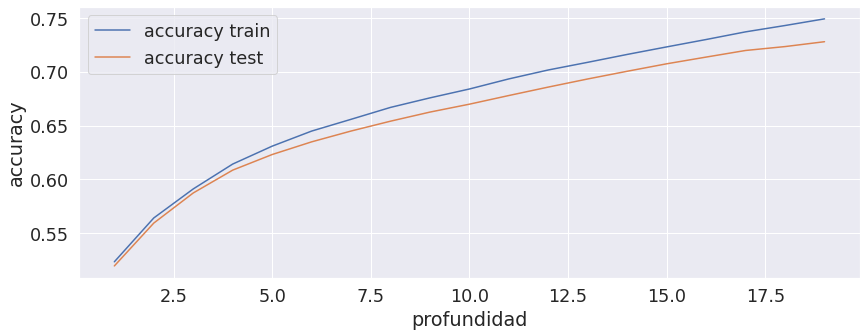

In [ ]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
ax.plot(profundidad, resultados_train, profundidad, resultados_test);
ax.legend(['accuracy train', 'accuracy test']);
ax.set(xlabel='profundidad',ylabel='accuracy');

### 2.4) Random Forest Model

El indice de Accuracy de test es: 0.87
El Accuracy en los datos de entrenamiento es de: 0.99
              precision    recall  f1-score   support

    Negative       0.81      0.74      0.78      1965
     Neutral       0.84      0.93      0.88      2997
    Positive       0.92      0.89      0.91      4964

    accuracy                           0.87      9926
   macro avg       0.86      0.85      0.85      9926
weighted avg       0.87      0.87      0.87      9926



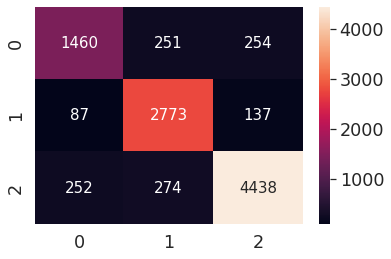

In [ ]:
# Defining the classifier used
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0) 

model.fit(X_train, y_train)     # Ajustando el clasificador al conjunto de entrenamiento

# Prediccion de resultados
y_pred = model.predict(X_test)

# Generando la matriz de confusion
cmatrix = confusion_matrix(y_test, y_pred)

# Generando indices de exactitud
accuracy = accuracy_score(y_test, y_pred)

#Preparando mapa de calor de la matriz de confusion
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Imprimiendo los resultados
print("El indice de Accuracy de test es:",round(accuracy,2))
print("El Accuracy en los datos de entrenamiento es de:", round(model.score(X_train,y_train),2))


# Printing Classification Report for Precision, recall and F1 Score
print(classification_report(y_test, y_pred))

In [ ]:
# estimadores = list(range(10,200,10))
# resultados_train = []
# resultados_test  = []

# for estimador in estimadores:
#     # instanciamos el modelo uniforme
#     model = RandomForestClassifier(n_estimators = estimador, criterion = 'entropy', random_state=0)
#     model.fit(X_train, y_train)
#     y_train_pred = model.predict(X_train)
#     y_pred = model.predict(X_test)
#     resultados_train.append(accuracy_score(y_train, y_train_pred))
#     resultados_test.append(accuracy_score(y_test, y_pred))

In [ ]:
# # veamos que paso en cada caso
# f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
# ax.plot(estimadores, resultados_train, estimadores, resultados_test);
# ax.legend(['accuracy train', 'accuracy test']);
# ax.set(xlabel='estimadores',ylabel='accuracy');

### 2.5) SVC Model

Accuracy on test Dataset is: 0.9
Accuracy on training Dataset is: 0.9
              precision    recall  f1-score   support

    Negative       0.89      0.77      0.82      1965
     Neutral       0.83      0.97      0.89      2997
    Positive       0.95      0.90      0.92      4964

    accuracy                           0.90      9926
   macro avg       0.89      0.88      0.88      9926
weighted avg       0.90      0.90      0.90      9926



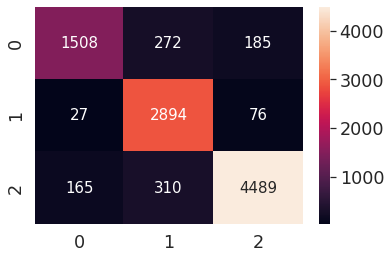

In [ ]:
clf.fit(X_train, y_train)      # Ajuste del clasificador al conjunto de datos de entrenamiento

# Prediccion de resultados
y_pred = clf.predict(X_test)

# Generando la Matrix de Confusión
cmatrix = confusion_matrix(y_test, y_pred)

# Generación de puntajes de precisión
accuracy = accuracy_score(y_test, y_pred)

#Preparación del mapa de calor de la matriz de confusión
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Imprimiento los resultados
print("Accuracy on test Dataset is:",round(accuracy,2))
print("Accuracy on training Dataset is:", round(clf.score(X_train,y_train),2))


# Informe de clasificación de impresión para precisión, recuperación y puntaje F1
print(classification_report(y_test, y_pred))

In [ ]:
# # Grilla para Random Search
# param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}

# #Aplicamos la grilla al modelo
# model = RandomizedSearchCV(clf, param_grid, n_iter=20, random_state=0, cv=5)
# model.fit(X_train, y_train)

# print("Mejores parametros: "+str(model.best_params_))
# print("Mejor Score: "+str(model.best_score_)+'\n')

### 2.6) AdaBoostClassifier

Accuracy on test Dataset is: 0.81
Accuracy on training Dataset is: 0.9
              precision    recall  f1-score   support

    Negative       0.85      0.61      0.71      1965
     Neutral       0.67      0.97      0.79      2997
    Positive       0.93      0.79      0.85      4964

    accuracy                           0.81      9926
   macro avg       0.82      0.79      0.79      9926
weighted avg       0.84      0.81      0.81      9926



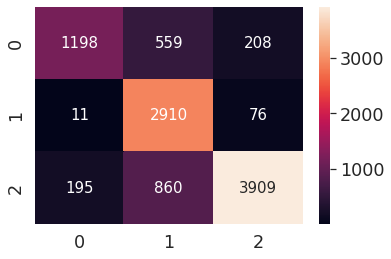

In [ ]:
# Creamos un AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)

#Fiteamos el modelo
model = ada.fit(X_train, y_train)

#Predicción!
y_pred = model.predict(X_test)

# Generating Confusion Matrix
cmatrix = confusion_matrix(y_test, y_pred)

# Generating Accuracy Scores
accuracy = accuracy_score(y_test, y_pred)

#Preparing Confusion Matrix Heatmap
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Printing results
print("Accuracy on test Dataset is:",round(accuracy,2))
print("Accuracy on training Dataset is:", round(clf.score(X_train,y_train),2))

# Printing Classification Report for Precision, recall and F1 Score
print(classification_report(y_test, y_pred))

### 2.7) Xgboost - Clasificación

Accuracy on test Dataset is: 0.81
Accuracy on training Dataset is: 0.9
              precision    recall  f1-score   support

    Negative       0.85      0.61      0.71      1965
     Neutral       0.67      0.97      0.79      2997
    Positive       0.93      0.79      0.85      4964

    accuracy                           0.81      9926
   macro avg       0.82      0.79      0.79      9926
weighted avg       0.84      0.81      0.81      9926



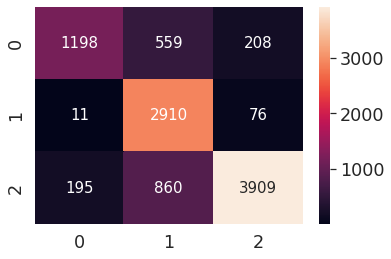

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123)

clf_xgb.fit(X_train,y_train) #Entrenamos el modelo

y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test

# Generating Confusion Matrix
cmatrix = confusion_matrix(y_test, y_pred)

# Generating Accuracy Scores
accuracy = accuracy_score(y_test, y_pred)

#Preparing Confusion Matrix Heatmap
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Printing results
print("Accuracy on test Dataset is:",round(accuracy,2))
print("Accuracy on training Dataset is:", round(clf.score(X_train,y_train),2))

# Printing Classification Report for Precision, recall and F1 Score
print(classification_report(y_test, y_pred))

### 2.8) Lightgbm - Clasificación

Accuracy on test Dataset is: 0.9
Accuracy on training Dataset is: 0.9
              precision    recall  f1-score   support

    Negative       0.89      0.77      0.82      1965
     Neutral       0.83      0.97      0.89      2997
    Positive       0.95      0.90      0.92      4964

    accuracy                           0.90      9926
   macro avg       0.89      0.88      0.88      9926
weighted avg       0.90      0.90      0.90      9926



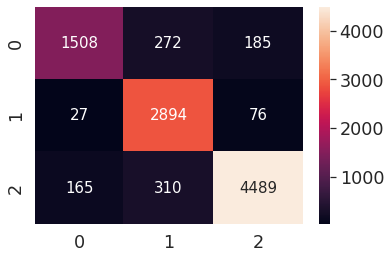

In [ ]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

# Generating Confusion Matrix
cmatrix = confusion_matrix(y_test, y_pred)

# Generating Accuracy Scores
accuracy = accuracy_score(y_test, y_pred)

#Preparing Confusion Matrix Heatmap
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Printing results
print("Accuracy on test Dataset is:",round(accuracy,2))
print("Accuracy on training Dataset is:", round(clf.score(X_train,y_train),2))

# Printing Classification Report for Precision, recall and F1 Score
print(classification_report(y_test, y_pred))

### 2.9  GradientBoostingClassifier

Accuracy on test Dataset is: 0.82
Accuracy on training Dataset is: 0.9
              precision    recall  f1-score   support

    Negative       0.85      0.58      0.69      1965
     Neutral       0.69      0.97      0.81      2997
    Positive       0.92      0.82      0.87      4964

    accuracy                           0.82      9926
   macro avg       0.82      0.79      0.79      9926
weighted avg       0.84      0.82      0.81      9926



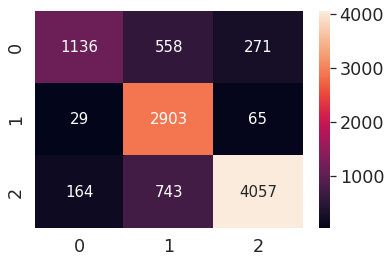

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)
y_pred=gbrt.predict(X_test)

# Generating Confusion Matrix
cmatrix = confusion_matrix(y_test, y_pred)

# Generating Accuracy Scores
accuracy = accuracy_score(y_test, y_pred)

#Preparing Confusion Matrix Heatmap
df_for_cm = pd.DataFrame(cmatrix, range(3),range(3))
sns.set(font_scale=1.6)
sns.heatmap(df_for_cm, annot_kws={"size": 15},fmt='g',annot=True)

#Printing results
print("Accuracy on test Dataset is:",round(accuracy,2))
print("Accuracy on training Dataset is:", round(clf.score(X_train,y_train),2))

# Printing Classification Report for Precision, recall and F1 Score
print(classification_report(y_test, y_pred))